<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Notebook 1 - Analyse Exploratoire des données </h1>
    
  <hr class="my-4">
   
  </div>
</div>

<p class="h1"; style="color:blue"> Analyse et Exploration des Données </p>

Dans cette notebook, nous allons ultilser à utiliser Python pour réaliser tâches courantes d’exploration et d’analyse des données (**explorer, visualiser et manipuler**). L’exploration de données est au cœur de la science des données et est un élément clé de l’analyse des données et de l’apprentissage automatique.

L’exploration et l’analyse de données constituent généralement un processus itératif au cours duquel le scientifique des données prend un échantillon de données et effectue les types de tâches suivants pour les analyser et tester des hypothèses :

- Nettoyer les données pour résoudre les erreurs, les valeurs manquantes et d’autres problèmes
- Appliquer des techniques statistiques pour mieux comprendre les données et déterminer si l’on peut s’attendre à ce que l’échantillon représente la population réelle de données, en tenant compte de la variation aléatoire
- Visualiser les données pour déterminer les relations entre les variables et, dans le cas d’un projet de Machine Learning, identifier les caractéristiques potentiellement prédictives de l’étiquette
- Réviser l’hypothèse et répéter le processus.


Dans cette partie nous effectuerons des visualisations de nos données pour mieux les comprendre. Il pourra  s’agir d’examiner les données brutes de les représenter sous forme de graphe. En effet, Les graphes constituent un moyen puissant de visualiser les données, car ils permettent de discerner rapidement des modèles relativement complexes sans avoir besoin de définir des mesures mathématiques synthétiques.

<p class="h3"; style="color:red">Mise en place de l'environnement de Travail</p>

Nous avons une variété de bibliothèques pour le traitement des données. Python offre des fonctionnalités complètes ainsi que de puissantes bibliothèques statistiques et numériques pour l'analyse de données : **Numpy, Pandas and Matplolib**.

- **NumPy** est une bibliothèque Python qui offre des fonctionnalités comparables à celles d’outils mathématiques comme MATLAB et R et propose donc des fonctions mathématiques complète
- **Pandas** est une bibliothèque Python extrêmement populaire pour l’analyse et la manipulation de données. C’est l’équivalent d’Excel pour Python, car elle fournit des fonctionnalités faciles à utiliser pour les tables de données. Par exemple Pandas peut ouvrir des fichiers texte ( .csv ) et les sauvegarder de facon structurer dans des tables appelés  **DataFrame**.
- NumPy et Pandas simplifient l’analyse et la manipulation de données.
- Matplotlib fournit des visualisations des données attrayantes.

In [1]:
# Import des librairies utiles à l'analyse exploratoire
# **Importation des librairies Python nécessaires**

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from IPython.display import display
import os

In [2]:
# Versions des librairies utilisés
print("Version librairie pandas: " + pd.__version__)
print("Version librairie numpy: " + np.__version__)
print("Version librairie matplotlib: " + matplotlib.__version__)
print("Version librairie seaborn: " + sns.__version__)
print("Version librairie missingno: " + msno.__version__)

Version librairie pandas: 1.4.1
Version librairie numpy: 1.20.3
Version librairie matplotlib: 3.5.1
Version librairie seaborn: 0.11.2
Version librairie missingno: 0.5.1


In [3]:
# Affichage d'un maximum de les lignes et colonnes

pd.set_option('display.max_column', 200)
#pd.set_option('display.max_rows', 500)

**Preparing Data - Chargement du jeu de données**

Let's open some text data that is stored on disk. Our data is saved in a file called `2016_Building_Energy_Benchmarking.csv`

In [4]:
# Importing pandas library
import pandas as pd 

# Read the text file containing data using pandas
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv", low_memory=True)

In [5]:
#dataset = pd.read_csv("2016_Building_Energy_Benchmarking.csv", delimiter=',',header='infer')

In [6]:
# Creating a copy of our dataset

df = data.copy()

In [7]:
# Print the shape of ou dataset 
print("Taile du jeu de données : ", df.shape)

# Print how many rows of data we have
print(f"  Notre jeu de données contient {len(df)} observations et {df.shape[1]} variables")

# Print the data at the top of the table
df.head()

Taile du jeu de données :  (3376, 46)
  Notre jeu de données contient 3376 observations et 46 variables


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [8]:
#!pip install folium

In [9]:
#folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=9)
#len(df)

#df.iloc[0]['Latitude']

In [10]:
import folium

m = folium.Map()
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],
               zoom_start=11)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], color="#FF0000" ,  
                  popup=df.iloc[i]['Address'], radius =100).add_to(m)
m

<p class="h3"; style="color:red">Analyse de forme la forme du Jeu de données </p>

**Description du jeu de données**

In [11]:
# Fonction permettant d'avoir une description du dataset

def data_set_overview(df):
    ''' function taking a dataframe in input and prints a dataframe summary containing
    number of rows, columns, missing cells and duplicate rows'''
    
    print('******** Dataset Overview *****\n')
    
    print ('Shape of the Dataset : {}'.format(df.shape))
    print ('Number of variables : {}'.format(df.shape[1]))
    print (' - Num. Quantitative variables : {}'.format(len(df.select_dtypes(include=["float64","int64"]).columns)))
    print (' - Num. Qualitative variables : {}'.format(len(df.select_dtypes(include=["object"]).columns)))
    print ('Number of obervations : {}'.format(df.shape[0]))
    print ('Number of cells : {}'.format(df.size))
    print ('Missing cells : {}'.format(df.isna().sum().sum()))
    print ('Missing cells in % : {:.2%}'.format(df.isna().sum().sum()/(df.size)))
    print ('Duplicate rows : {}'.format(len(df)-len(df.drop_duplicates())))
    print ('Duplicate rows in % : {:.4%}'.format((len(df)-len(df.drop_duplicates())) / (df.shape[0])))
    print("\n************** End ************")

In [12]:
# Application de la fonction pour décrire le jeu de donnnées

data_set_overview(df)

******** Dataset Overview *****

Shape of the Dataset : (3376, 46)
Number of variables : 46
 - Num. Quantitative variables : 30
 - Num. Qualitative variables : 15
Number of obervations : 3376
Number of cells : 155296
Missing cells : 19952
Missing cells in % : 12.85%
Duplicate rows : 0
Duplicate rows in % : 0.0000%

************** End ************


In [13]:
# Affichage des variables quantitatives
numerical_cols = df.select_dtypes(include=["float64","int64"]).columns
numerical_cols

Index(['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [14]:
# Affichage des Variables qualitatives
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'ComplianceStatus', 'Outlier'],
      dtype='object')

In [15]:
# Informations sur les variables et leurs types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

<p class="h3"; style="color:red">Definition des variables du jeu de données </p>

Dans cette partie nous allon definir toute nos variables afin d'avoir une meilleure compréhension de notre jeu de données ce qui nous permettra d'avoir une approche plus éclairé sur nos données: 

Informations générales sur les propriétés :
- **OSEBuildingID** = identifiant unique attribué par Seattle à chaque propriété.

- **DataYear** = Année du tout premier relevé de référence pour chaque propriété enregistré

- **BuildingType** = Classification des types de la propriété

- **PrimaryPropertyType** = Utilisation principale de la propriété

- **PropertyName** = Nom du bâtiment

- **TaxParcelIdentificationNumber** = Code PIN du comté de King

- **YearBuilt** = Année de construction des batiments dans la propriété

- **NumberofBuildings** = Nombre de bâtiments inclus dans la propriété (cf campus composé de plusieurs bâtiments)

- **NumberofFloors** = Nombre d'étages de la propriété


Informations relative à la surface et l'utilisation des propriétés :

- **PropertyGFATotal** = Surface brute totale du bâtiment et du parking.

- **PropertyGFAParking** = Surface totale de tous les parkings

- **PropertyGFABuilding(s)** = Surface totale du bâtiment.

- **ListOfAllPropertyUseTypes** = Liste des utilisations des biens immobiliers

- **LargestPropertyUseType** = Utilisation la plus importante d'un bien immobilier (ex : bureau, magasin)

- **LargestPropertyUseTypeGFA** = Surface de l'utilisation la plus importante du bien

- **SecondLargestPropertyUseType** = La deuxième plus grande utilisation d'un bien immobilier

- **SecondLargestPropertyUseTypeGFA** = Surface de l'utilisation la deuxième plus importante du bien

- **ThirdLargestPropertyUseType** = La troisième plus grande utilisation d'un bien immobilier

- **ThirdLargestPropertyUseTypeGFA** = Surface de l'utilisation la troisième plus importante du bien


Informations relative à consommation d'énergie:

- **YearsENERGYSTARCertified** = Année de certification ENERGY STAR.

- **ENERGYSTARScore** = Performance énergétique globale d'une propriété

- **SiteEUI(kBtu/sf)** = Consommation d'énergie : Quantité annuelle d'énergie consommée par le site

- **SiteEUIWN(kBtu/sf)** = Quantité d’énergie que le bien immobilier aurait consommée dans des conditions météorologiques moyennes sur 30 ans.

- **SourceEUI(kBtu/sf)** = La quantité d’énergie annuelle utilisée pour l'exploitation du bien, y compris les pertes dues à la production, au transport et à la distribution.

- **SourceEUIWN(kBtu/sf)** = Quantité d'énergie de la source que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans.

- **SiteEnergyUse(kBtu)** = La quantité annuelle d'énergie consommée par le bien, toutes sources d'énergie confondues

- **SiteEnergyUseWN(kBtu)** = La quantité annuelle d'énergie consommée par le bien, toutes sources d'énergie confondues, ajustée à ce que le bien aurait consommé dans des conditions météorologiques moyennes sur 30 ans.


Informations relative à l'émission du CO2:

- **SteamUse(kBtu)** = Quantité annuelle de vapeur consommée par le bâtiment

- **Electricity(kBtu)** = Quantité annuelle d'électricité consommée par la propriété, y compris l'électricité achetée au réseau et produite par des systèmes renouvelables sur place

- **Electricity(kWh)** = Quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée au réseau et produite par des systèmes renouvelables sur place (en kilowatt/ heure)

- **NaturalGas(therms)** = Quantité annuelle de gaz naturel consommée par le bien

- **NaturalGas(kBtu**) = Quantité annuelle de gaz naturel consommée par le bien en milliers d'unités thermiques britanniques (kBtu).

- **OtherFuelUse(kBtu)** = autres carburants utilisés

- **TotalGHGEmissions** = Quantité totale d'émissions de gaz à effet de serre rejetée dans l'atmosphère à la suite de la consommation d'énergie sur le site, mesurée en tonnes d'équivalent dioxyde de carbone.

- **GHGEmissionsIntensity** = Total des émissions de gaz à effet de serre divisé par la surface brute de la propriété, mesurée en kilogrammes d'équivalent dioxyde de carbone par pied carré.


Autres informations utiles 
- **DefaultData** = La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.

- **Comments** = Commentaires pour fournir un contexte à la consommation d'énergie du bâtiment

- **ComplianceStatus** = Si un bien immobilier a satisfait aux exigences en matière d'analyse comparative de la consommation d'énergie pour l'année en cours.

- **Outlier** = La donnée est-elle une valeur aberrante ?

- **2010 Census Tracts** = recensement datant de 2010



Informations sur les données geographiques des propriétées

- **Neighborhood** = Quartier de la propriété

- **City Council Districts** = Districts du conseil municipal

- **CouncilDistrictCode** = Code du conseil municipal de la ville

- **SPD Beats** = à quelle station de police est relié le bâtiment

- **Latitude** = latitude du bâtiment

- **Longitude** = longitude du bâtiment

- **Address** = adresse du bâtiment

- **City** = ville où se trouve le bâtiment

- **State** = état où se trouve le bâtiment

- **Zip_Code** = code zip du bâtiment

<p class="h3"; style="color:red">Analyse  et traitement des valeurs manquantes</p>

L'un des problèmes les plus courants auxquels les data scientists doivent faire face est celui des **données incomplètes ou manquantes**. 

- Alors, comment saurions-nous que le DataFrame contient des valeurs manquantes ? 
- Comment ses données sont traitées

Telles sont les sujets que nous aborderons dans cette partie

In [16]:
# utilisation de la méthode df.isnull() pour identifier les valeurs individuelles nulles
   ## ensuite nous pouvons  obtenir la somme des valeurs manquantes pour chaque colonne avec la méthode .sum()
df.isnull().sum().sort_values(ascending=False)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
SourceEUIWN(kBtu/sf)                  9
SourceEUI(kBtu/sf)                    9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
TotalGHGEmissions                     9
SteamUse(kBtu)                        9
GHGEmissionsIntensity                 9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SiteEnergyUseWN(kBtu)                 6


In [17]:
# Fonction qui renvoie la proportion de NaN sur l'ensemble du dataset
def print_proportion_nan(df):
        print('Taille du jeu de données : ', df.shape)
        print(' --> Proportion de NaN : {:.2%}'.format(df.isna().sum().sum()/(df.shape[0]*df.shape[1])))
        
              
        return None

In [18]:
print_proportion_nan(df)

Taille du jeu de données :  (3376, 46)
 --> Proportion de NaN : 12.85%


In [19]:
# Fonction permettant d'avoir une description des valeurs manquantes

def ms_values_overview(dataframe):
    '''function that takes a dataframe as input and output a dataframe containing variables types, 
    number of missing values and percentaage  of missing'''

    print ("\n               ********************** Missing Value Summary *****************              \n")
    #print ('Number of obervations : {}'.format(dataframe.shape[0]))
    #print(' --> Proportion de NaN : {:.2%}'.format(df.isna().sum().sum()/(df.shape[0]*df.shape[1])))
    
    summary = pd.DataFrame(dataframe.dtypes)
    summary = summary.rename(columns={0:'Variable type'})
    
    summary["Is Missing ? "] = dataframe.isna().any()
    summary["Count Missing"] = dataframe.isnull().sum()
    summary["Count Notnull"] = dataframe.notnull().sum()
    summary["% Notnull"] = dataframe.notnull().sum()/len(dataframe)
    summary["% Missing"] = dataframe.isna().mean()
    #summary["% of Missing"] = round(100*(dataframe.isna().mean()))
    
    summary = summary.sort_values(by=['Count Missing'], ascending=False)
    
    
    summary[['% Notnull', '% Missing']] = summary[['% Notnull','% Missing']].applymap("{:.2%}".format)
    #style.format({'% Missing': "{:.2%}"})
    
    return summary

In [20]:
# Application de la fonction 

#sort_values(by=['Count Missing'], ascending=False).style.format({'Missing': "{:.2%}"})

ms_values_overview(df)


               ********************** Missing Value Summary *****************              



Variable type  Is Missing ?   Count Missing  \
Comments                              float64           True           3376   
Outlier                                object           True           3344   
YearsENERGYSTARCertified               object           True           3257   
ThirdLargestPropertyUseType            object           True           2780   
ThirdLargestPropertyUseTypeGFA        float64           True           2780   
SecondLargestPropertyUseType           object           True           1697   
SecondLargestPropertyUseTypeGFA       float64           True           1697   
ENERGYSTARScore                       float64           True            843   
LargestPropertyUseTypeGFA             float64           True             20   
LargestPropertyUseType                 object           True             20   
ZipCode                               float64           True             16   
ListOfAllPropertyUseTypes              object           True              9   
SourceEUIWN(kBtu/sf)                  float64           True              9   
SourceEUI(kBtu/sf)                    float64           True              9   
Electricity(kWh)                      float64           True              9   
Electricity(kBtu)                     float64           True              9   
NaturalGas(therms)                    float64           True              9   
NaturalGas(kBtu)                      float64           True              9   
TotalGHGEmissions                     float64           True              9   
SteamUse(kBtu)                        float64           True              9   
GHGEmissionsIntensity                 float64           True              9   
NumberofBuildings                     float64           True              8   
SiteEUI(kBtu/sf)                      float64           True              7   
SiteEUIWN(kBtu/sf)                    float64           True              6   
SiteEnergyUseWN(kBtu)                 float64           True              6   
SiteEnergyUse(kBtu)                   float64           True              5   
TaxParcelIdentificationNumber          object          False              0   
BuildingType                           object          False              0   
PrimaryPropertyType                    object          False              0   
ComplianceStatus                       object          False              0   
PropertyName                           object          False              0   
DefaultData                              bool          False              0   
Address                                object          False              0   
City                                   object          False              0   
State                                  object          False              0   
PropertyGFABuilding(s)                  int64          False              0   
CouncilDistrictCode                     int64          False              0   
PropertyGFAParking                      int64          False              0   
Neighborhood                           object          False              0   
Latitude                              float64          False              0   
Longitude                             float64          False              0   
YearBuilt                               int64          False              0   
NumberofFloors                          int64          False              0   
PropertyGFATotal                        int64          False              0   
DataYear                                int64          False              0   
OSEBuildingID                           int64          False              0   

                                 Count Notnull % Notnull % Missing  
Comments                                     0     0.00%   100.00%  
Outlier                                     32     0.95%    99.05%  
YearsENERGYSTARCertified                   119     3.52%    96.48%  
ThirdLargestPropertyUseType               

In [21]:
#df[df.isnull().any(axis=1)]


               ********************** Missing Value Summary *****************              



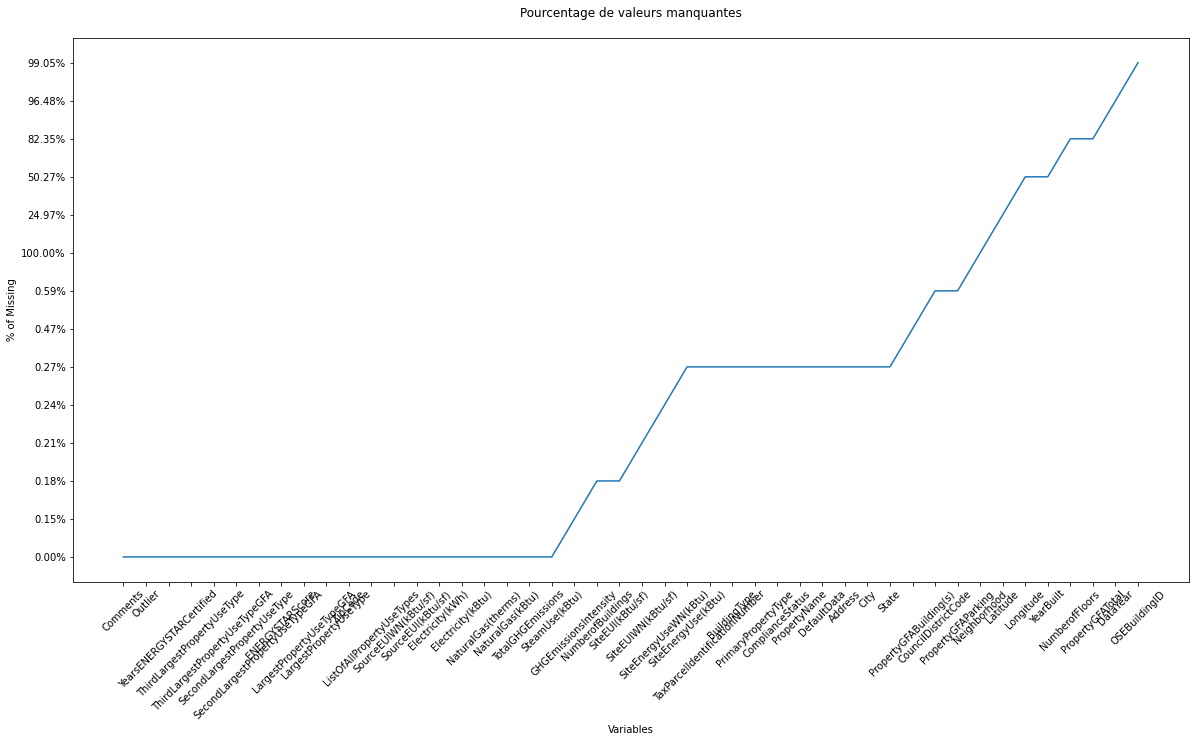

In [22]:
# % Visualisation des valeurs manquantes

import matplotlib.pyplot as plt

to_plot = ms_values_overview(df)

#row selected values 
x_labels = to_plot.index
y_values = to_plot['% Missing'].sort_values(ascending=True)


fig = plt.figure(figsize=(20,10))
ax = plt.axes()

plt.xticks(rotation=45)

plt.plot(x_labels, y_values)
plt.title("Pourcentage de valeurs manquantes\n")
plt.xlabel('Variables')
plt.ylabel('% of Missing')

plt.show()

<AxesSubplot:>

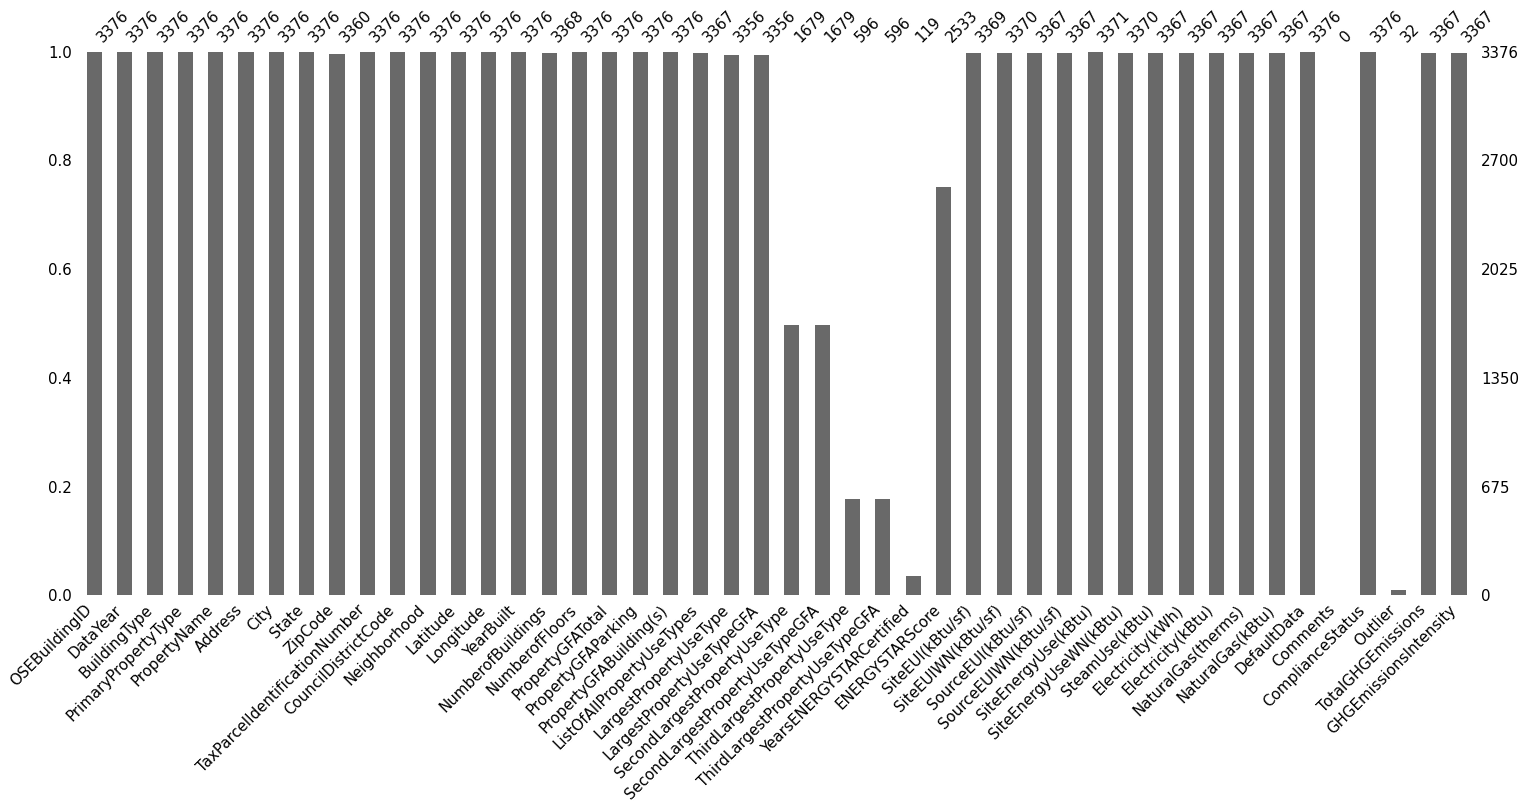

In [23]:
# msno.bar(df)
msno.bar(df, figsize=(25,10) , fontsize=15)

### Analyse de la colonne Outlier

In [24]:
print('Surface du plus grand batiment :', df['PropertyGFATotal'].max())
print('Surface du plus grand batiment :', df['PropertyGFATotal'].min())
print('---------------------------------------------------------\n')
print('Surface moyen des batiments :', df['PropertyGFATotal'].mean())
print('Surface median des batiments :', df['PropertyGFATotal'].median())

Surface du plus grand batiment : 9320156
Surface du plus grand batiment : 11285
---------------------------------------------------------

Surface moyen des batiments : 94833.53732227487
Surface median des batiments : 44175.0


In [25]:
df.sort_values(by='PropertyGFATotal', ascending=False).head(10)
#df.sort_values(by='PropertyGFATotal', ascending=False).tail(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
3274          49967      2016          Campus          University   
1494          22062      2016          Campus          University   
559             775      2016  NonResidential        Large Office   
618             828      2016  NonResidential            Hospital   
292             422      2016  NonResidential        Large Office   
490             659      2016  NonResidential        Large Office   
155             245      2016  NonResidential               Other   
273             402      2016  NonResidential        Large Office   
304             435      2016  NonResidential               Other   
271             399      2016  NonResidential        Large Office   

                                   PropertyName                    Address  \
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
1494                              Entire Campus            901 12th Avenue   
559                      Columbia Center - 2015             701 5th Avenue   
618                          Swedish First Hill               747 Broadway   
292                            Two Union Square              601 Union St.   
490                  Russell Investments Center               1301 2nd Ave   
155                                 CenturyLink  800 Occidental Ave. South   
273                              US Bank Centre            1420 5th Avenue   
304          Washington State Convention Center                705 Pike St   
271                           1201 Third Avenue               1201 3rd ave   

         City State  ZipCode TaxParcelIdentificationNumber  \
3274  Seattle    WA  98105.0                    1625049001   
1494  Seattle    WA  98122.0                    2254500880   
559   Seattle    WA  98104.0                    0942000640   
618   Seattle    WA  98122.0                    1978201096   
292   Seattle    WA  98101.0                    1976700125   
490   Seattle    WA  98101.0                    9184500000   
155   Seattle    WA  98134.0                    7666204876   
273   Seattle    WA  98101.0                    1975700080   
304   Seattle    WA  98101.0                    1978200105   
271   Seattle    WA  98101.0                    1974700120   

      CouncilDistrictCode      Neighborhood   Latitude   Longitude  YearBuilt  \
3274                    4         NORTHEAST  47.656440 -122.310410       1900   
1494                    3              EAST  47.610650 -122.317110       1939   
559                     7          DOWNTOWN  47.604540 -122.330720       1985   
618                     3              EAST  47.608951 -122.322402       1994   
292                     7          DOWNTOWN  47.610430 -122.332060       1989   
490                     7          DOWNTOWN  47.607400 -122.337770       2005   
155                     2  GREATER DUWAMISH  47.595440 -122.331590       1999   
273                     7          DOWNTOWN  47.610540 -122.334660       1989   
304                     7          DOWNTOWN  47.611950 -122.331670       1990   
271                     7          DOWNTOWN  47.607230 -122.336110       1988   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274              111.0               0           9320156                   0   
1494                1.0               2           2200000                   0   
559                 1.0              76           1952220              319400   
618                 7.0              14           1765970                   0   
292                 1.0              56           1605578              389860   
490                 1.0              42           1592914                   0   
155                 1.0               6           1585960              327680   
273                 1.0              46           1536606              512608   
304                 1.0               6           1400000                   0   
27

<AxesSubplot:>

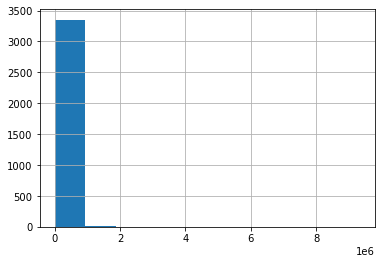

In [26]:
df['PropertyGFATotal'].hist()

<AxesSubplot:>

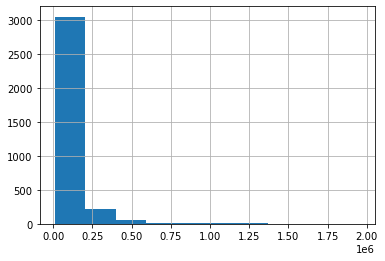

In [27]:
df.loc[df['PropertyGFATotal'] <= 2000000,:]['PropertyGFATotal'].hist()

In [28]:
#df[df['Outlier'].notnull()].nunique().sort_values(ascending=False)

outlier_col_mask = df['Outlier'].notnull()
df_oulier_col = df[outlier_col_mask]
df_oulier_col['Outlier'].value_counts()



print("Plus grosse consommation d'energie :", df['SiteEnergyUse(kBtu)'].max())
print("Plus petite consommation d'energie :", df['SiteEnergyUse(kBtu)'].min())
print("Consommation moyenne d'energie :", df['SiteEnergyUse(kBtu)'].mean())
print("Consommation median d'energie :", df['SiteEnergyUse(kBtu)'].median())

print('---------------------------------------------------------\n')

print("Plus grosse Emission CO2 :", df['TotalGHGEmissions'].max())
print("Plus petite Emission CO2 :", df['TotalGHGEmissions'].min())
print("Emission moyen de CO2 :", df['TotalGHGEmissions'].mean())
print("Emission median de CO2 :", df['TotalGHGEmissions'].median())

df_oulier_col[['OSEBuildingID', 'PropertyName', 'ListOfAllPropertyUseTypes', 'PrimaryPropertyType', 
               'SecondLargestPropertyUseType','NumberofBuildings', 'NumberofFloors', 
               'PropertyGFATotal', 'SiteEnergyUse(kBtu)','TotalGHGEmissions', 'Outlier']].\
             sort_values(by='TotalGHGEmissions', ascending=False).head(10)

Plus grosse consommation d'energie : 873923712.0
Plus petite consommation d'energie : 0.0
Consommation moyenne d'energie : 5403667.294533333
Consommation median d'energie : 1803753.25
---------------------------------------------------------

Plus grosse Emission CO2 : 16870.98
Plus petite Emission CO2 : -0.8
Emission moyen de CO2 : 119.72397089397079
Emission median de CO2 : 33.92


OSEBuildingID                  PropertyName  \
3092          29390  Commodore Duchess Apartments   
3082          28735                    Building 4   
226             350    Second And Spring Building   
2763          26852                Atlas Building   
517             704          401 Elliott Ave West   
2922          27526                      Vali Hai   
2863          27245          St. Johns Apartments   
3265          49943                 Stewart House   
1707          23174       Taylor Anne Condominium   
448             608        411 1ST AVE  S (ID608)   

                              ListOfAllPropertyUseTypes   PrimaryPropertyType  \
3092                                Multifamily Housing  Mid-Rise Multifamily   
3082                                Multifamily Housing  Low-Rise Multifamily   
226                        Data Center, Office, Parking          Large Office   
2763      Multifamily Housing, Restaurant, Retail Store  Low-Rise Multifamily   
517                        Data Center, Office, Parking          Large Office   
2922        Multifamily Housing, Parking, Swimming Pool  Low-Rise Multifamily   
2863                  Multifamily Housing, Retail Store  Low-Rise Multifamily   
3265  Food Sales, Multifamily Housing, Restaurant, R...  Low-Rise Multifamily   
1707                                Multifamily Housing  Mid-Rise Multifamily   
448                                              Office          Large Office   

     SecondLargestPropertyUseType  NumberofBuildings  NumberofFloors  \
3092                       Office                1.0               8   
3082                          NaN                1.0               4   
226                   Data Center                1.0               6   
2763                 Retail Store                1.0               4   
517                       Parking                1.0               4   
2922                      Parking                2.0               4   
2863                 Retail Store                1.0               3   
3265                   Food Sales                1.0               3   
1707                          NaN                1.0               5   
448                           NaN                5.0               7   

      PropertyGFATotal  SiteEnergyUse(kBtu)  TotalGHGEmissions       Outlier  
3092             97923           10343027.0             686.53  High outlier  
3082             46725           13459221.0             531.96  High outlier  
226             172842           41399504.0             362.66  High outlier  
2763             46560            6881405.5             284.42  High outlier  
517             129551           27137190.0             189.18  High outlier  
2922             43346            4519115.0             148.02  High outlier  
2863             24682            2681771.0              96.18  High outlier  
3265             49000            4602793.5              78.39  High outlier  
1707             30569            6834431.0              54.25  High outlier  
448             154159           11195917.0              29.43   Low outlier

In [29]:
df['Outlier'].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [30]:
df['ComplianceStatus'].value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [31]:
df[df['ComplianceStatus'] == 'Non-Compliant'].head(15)

OSEBuildingID  DataYear          BuildingType  \
226             350      2016        NonResidential   
304             435      2016        NonResidential   
384             539      2016        NonResidential   
448             608      2016        NonResidential   
517             704      2016        NonResidential   
578             773      2016        NonResidential   
720           19708      2016  Multifamily HR (10+)   
758           19798      2016  Multifamily LR (1-4)   
834           19934      2016  Multifamily LR (1-4)   
962           20367      2016  Multifamily LR (1-4)   
1229          21315      2016        NonResidential   
1295          21474      2016        NonResidential   
1341          21562      2016  Multifamily LR (1-4)   
1549          22363      2016  Multifamily LR (1-4)   
1611          22830      2016        NonResidential   

              PrimaryPropertyType                        PropertyName  \
226                  Large Office          Second And Spring Building   
304                         Other  Washington State Convention Center   
384                  Retail Store                   University Center   
448                  Large Office              411 1ST AVE  S (ID608)   
517                  Large Office                401 Elliott Ave West   
578   Small- and Mid-Sized Office                    SEATTLE BUILDING   
720         High-Rise Multifamily                           Bay Vista   
758          Low-Rise Multifamily                      SANDHURST APTS   
834          Low-Rise Multifamily                       Belmont Lofts   
962          Low-Rise Multifamily               City Lights on Harbor   
1229  Small- and Mid-Sized Office                     1518 Fifith Ave   
1295                        Other                      The Lusty Lady   
1341         Low-Rise Multifamily               Diplomat Condominiums   
1549         Low-Rise Multifamily                   Forte Condominium   
1611             Worship Facility                      Freedom Church   

                     Address     City State  ZipCode  \
226       1100 Second Avenue  Seattle    WA  98101.0   
304              705 Pike St  Seattle    WA  98101.0   
384    4501 Roosevelt Way NE  Seattle    WA  98105.0   
448            411 1ST AVE S  Seattle    WA  98104.0   
517      401 Elliot Ave West  Seattle    WA  98119.0   
578          215 COLUMBIA ST  Seattle    WA  98104.0   
720             2821 2nd Ave  Seattle    WA  98121.0   
758   7239 SAND POINT WAY NE  Seattle    WA  98115.0   
834        231 Belmont Ave E  Seattle    WA  98102.0   
962      2349 Harbor Ave. SW  Seattle    WA  98126.0   
1229          1520 Fifth Ave  Seattle    WA  98101.0   
1295            1315 1st Ave  Seattle    WA  98101.0   
1341     4444 44th Avenue SW  Seattle    WA  98116.0   
1549         840 NE 125th St  Seattle    WA  98125.0   
1611           9601 35th Ave  Seattle    WA  98126.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
226                     0942000045                    7   
304                     1978200105                    7   
384                     5335200380                    4   
448                     5247800200                    2   
517                     7666202110                    7   
578                     0939000245                    7   
720                     0586400000                    7   
758                     0225049032                    4   
834                     0704600000                    3   
962                     1595200000                    1   
1229                    1975700135                    7   
1295                    1976200060                    7   
1341                    2041200000                    1   
1549                    2607980000                    5   
1611                    2858600090                    1   

               Neighborhood  Latitude  Longitude  YearBuilt  \
226                DOWNTOWN  47.60642 -122.33581   

In [32]:
df[df['Outlier'] == 'High outlier'].head(15)

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
226             350      2016        NonResidential          Large Office   
517             704      2016        NonResidential          Large Office   
1707          23174      2016  Multifamily LR (1-4)  Mid-Rise Multifamily   
2763          26852      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
2863          27245      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
2922          27526      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
3082          28735      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
3092          29390      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
3265          49943      2016  Multifamily LR (1-4)  Low-Rise Multifamily   

                      PropertyName                   Address     City State  \
226     Second And Spring Building        1100 Second Avenue  Seattle    WA   
517           401 Elliott Ave West       401 Elliot Ave West  Seattle    WA   
1707       Taylor Anne Condominium         1730 Taylor Ave N  Seattle    WA   
2763                Atlas Building  420 Maynard Avenue South  Seattle    WA   
2863          St. Johns Apartments        725 E. Pike Street  Seattle    WA   
2922                      Vali Hai            800 1st Ave N.  Seattle    WA   
3082                    Building 4     400 NE Thornton Place  Seattle    WA   
3092  Commodore Duchess Apartments          4005 15th Ave NE  Seattle    WA   
3265                 Stewart House         80 Stewart Street  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
226   98101.0                    0942000045                    7   
517   98119.0                    7666202110                    7   
1707  98109.0                    8567250000                    7   
2763  98104.0                    5247802315                    2   
2863  98122.0                    7502500061                    3   
2922  98112.0                    5457300300                    7   
3082  98125.0                    8632880000                    5   
3092  98105.0                    1142002395                    4   
3265  98101.0                    8008550000                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
226                DOWNTOWN  47.60642 -122.33581       1958   
517   MAGNOLIA / QUEEN ANNE  47.62235 -122.36378       2000   
1707  MAGNOLIA / QUEEN ANNE  47.63435 -122.34671       1969   
2763               DOWNTOWN  47.59858 -122.32470       1920   
2863                   EAST  47.61390 -122.32241       1910   
2922  MAGNOLIA / QUEEN ANNE  47.62670 -122.35506       1959   
3082                  NORTH  47.70188 -122.32459       2008   
3092              NORTHEAST  47.65570 -122.31244       1925   
3265               DOWNTOWN  47.60994 -122.34234       1904   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
226                 1.0               6            172842               25920   
517                 1.0               4            129551               42500   
1707                1.0               5             30569                   0   
2763                1.0               4             46560                   0   
2863                1.0               3             24682                   0   
2922                2.0               4             43346                   0   
3082                1.0               4             46725                   0   
3092                1.0               8             97923                   0   
3265                1.0               3             49000                   0   

      PropertyGFABuilding(s)  \
226                   146922   
517                    87051   
1707                   30569   
2763                   46560   
2863                   24682   
2922                   43346   
3082                   46725   
3092                   97923   
3265                   49000   



In [33]:
df[df['Outlier'] == 'Low outlier'].head(15)

OSEBuildingID  DataYear          BuildingType  \
384             539      2016        NonResidential   
448             608      2016        NonResidential   
720           19708      2016  Multifamily HR (10+)   
834           19934      2016  Multifamily LR (1-4)   
839           19967      2016     SPS-District K-12   
962           20367      2016  Multifamily LR (1-4)   
1045          20617      2016        NonResidential   
1229          21315      2016        NonResidential   
1295          21474      2016        NonResidential   
1341          21562      2016  Multifamily LR (1-4)   
1611          22830      2016        NonResidential   
1888          23708      2016  Multifamily LR (1-4)   
1945          23912      2016        NonResidential   
2129          24547      2016        NonResidential   
2189          24717      2016        NonResidential   

              PrimaryPropertyType               PropertyName  \
384                  Retail Store          University Center   
448                  Large Office     411 1ST AVE  S (ID608)   
720         High-Rise Multifamily                  Bay Vista   
834          Low-Rise Multifamily              Belmont Lofts   
839                   K-12 School             Queen Anne Gym   
962          Low-Rise Multifamily      City Lights on Harbor   
1045                 Retail Store      Seattle Habitat Store   
1229  Small- and Mid-Sized Office            1518 Fifith Ave   
1295                        Other             The Lusty Lady   
1341         Low-Rise Multifamily      Diplomat Condominiums   
1611             Worship Facility             Freedom Church   
1888         Low-Rise Multifamily      Anne Vista Apartments   
1945  Small- and Mid-Sized Office             1416 S Jackson   
2129                  K-12 School  Islamic School of Seattle   
2189                        Other   1701 First Ave South LLC   

                        Address     City State  ZipCode  \
384       4501 Roosevelt Way NE  Seattle    WA  98105.0   
448               411 1ST AVE S  Seattle    WA  98104.0   
720                2821 2nd Ave  Seattle    WA  98121.0   
834           231 Belmont Ave E  Seattle    WA  98102.0   
839              1431 2nd Ave N  Seattle    WA  98109.0   
962         2349 Harbor Ave. SW  Seattle    WA  98126.0   
1045             21 S Nevada St  Seattle    WA  98134.0   
1229             1520 Fifth Ave  Seattle    WA  98101.0   
1295               1315 1st Ave  Seattle    WA  98101.0   
1341        4444 44th Avenue SW  Seattle    WA  98116.0   
1611              9601 35th Ave  Seattle    WA  98126.0   
1888       2416-2420 54th Pl Sw  Seattle    WA  98116.0   
1945  1416 South Jackson Street  Seattle    WA  98133.0   
2129               720 25TH AVE  Seattle    WA  98122.0   
2189       1701 First Ave South  Seattle    WA  98134.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
384                     5335200380                    4   
448                     5247800200                    2   
720                     0586400000                    7   
834                     0704600000                    3   
839                     0811000005                    7   
962                     1595200000                    1   
1045                    1824049074                    2   
1229                    1975700135                    7   
1295                    1976200060                    7   
1341                    2041200000                    1   
1611                    2858600090                    1   
1888                    3505100761                    1   
1945                    3320000165                    3   
2129                    6840700175                    3   
2189                    7666207085                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
384               NORTHEAST  47.66178 -122.31812       1987   
448                DOWNTOWN  47.59878 -122.33458       1913   
720                DO

In [34]:
#df[df["PrimaryPropertyType"].str.contains('Large Office', regex=True)==True]

In [35]:
"""
Non_residential_oulier_ID = ["350", "704"]


indexNames = df[ (df['OSEBuildingID'] == 350)
                & (df['Price'] == 704) ].index
df.drop(indexNames , inplace=True)

"""

'\nNon_residential_oulier_ID = ["350", "704"]\n\n\nindexNames = df[ (df[\'OSEBuildingID\'] == 350)\n                & (df[\'Price\'] == 704) ].index\ndf.drop(indexNames , inplace=True)\n\n'

In [36]:
df.sort_values(by='SiteEnergyUse(kBtu)', ascending=False).head(5)
df.sort_values(by='SiteEnergyUse(kBtu)', ascending=False).tail(5)

OSEBuildingID  DataYear          BuildingType  \
578             773      2016        NonResidential   
758           19798      2016  Multifamily LR (1-4)   
1792          23437      2016  Multifamily LR (1-4)   
2474          25752      2016  Multifamily LR (1-4)   
2670          26532      2016        NonResidential   

              PrimaryPropertyType         PropertyName  \
578   Small- and Mid-Sized Office     SEATTLE BUILDING   
758          Low-Rise Multifamily       SANDHURST APTS   
1792         Low-Rise Multifamily     MERCER CREST APT   
2474         Low-Rise Multifamily  GRANVIEW APARTMENTS   
2670           Mixed Use Property     KALBERG BUILDING   

                     Address     City State  ZipCode  \
578          215 COLUMBIA ST  Seattle    WA  98104.0   
758   7239 SAND POINT WAY NE  Seattle    WA  98115.0   
1792         500 W MERCER ST  Seattle    WA  98119.0   
2474          1120 N 93RD ST  Seattle    WA  98103.0   
2670  4515 UNIVERSITY WAY NE  Seattle    WA  98105.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
578                     0939000245                    7   
758                     0225049032                    4   
1792                    3876900230                    7   
2474                    9267200155                    6   
2670                    8816401120                    4   

               Neighborhood  Latitude  Longitude  YearBuilt  \
578                DOWNTOWN  47.60380 -122.33293       1924   
758               NORTHEAST  47.68149 -122.26471       1977   
1792  MAGNOLIA / QUEEN ANNE  47.62479 -122.36364       1957   
2474              NORTHWEST  47.69658 -122.34342       1989   
2670              NORTHEAST  47.66182 -122.31345       1928   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
578                 NaN               4             63150                   0   
758                 NaN               3             33166                   0   
1792                NaN               4             23636                   0   
2474                NaN               4             29562                8531   
2670                NaN               2             20760                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
578                    63150                       NaN                    NaN   
758                    33166                       NaN                    NaN   
1792                   23636                       NaN                    NaN   
2474                   21031                       NaN                    NaN   
2670                   20760                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
578                         NaN                          NaN   
758                         NaN                          NaN   
1792                        NaN                          NaN   
2474                        NaN                          NaN   
2670                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
578                               NaN                         NaN   
758                               NaN                         NaN   
1792                              NaN                         NaN   
2474                              NaN                         NaN   
2670                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
578                              NaN                      NaN   
758                              NaN                      NaN   
1792                             NaN                      NaN   
2474                             NaN                      NaN   
2670                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
578               NaN      

In [37]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [38]:
df[df['PrimaryPropertyType'] == "University"].sort_values(by='PropertyGFATotal', ascending=False).head()

OSEBuildingID  DataYear BuildingType PrimaryPropertyType  \
3274          49967      2016       Campus          University   
1494          22062      2016       Campus          University   
128             211      2016       Campus          University   
2325          25251      2016       Campus          University   
105             172      2016       Campus          University   

                                   PropertyName                    Address  \
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
1494                              Entire Campus            901 12th Avenue   
128                            NSCC MAIN CAMPUS         9600 COLLEGE WAY N   
2325                    5th Avenue Master Meter            3307 3rd Ave. W   
105                            SSCC MAIN CAMPUS           6000 16th Ave SW   

         City State  ZipCode TaxParcelIdentificationNumber  \
3274  Seattle    WA  98105.0                    1625049001   
1494  Seattle    WA  98122.0                    2254500880   
128   Seattle    WA  98103.0                    3226049021   
2325  Seattle    WA  98119.0                    8900000555   
105   Seattle    WA  98106.0                    6171900005   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
3274                    4              NORTHEAST  47.65644 -122.31041   
1494                    3                   EAST  47.61065 -122.31711   
128                     5              NORTHWEST  47.69936 -122.33401   
2325                    7  MAGNOLIA / QUEEN ANNE  47.65019 -122.36173   
105                     1               DELRIDGE  47.54700 -122.35307   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3274       1900              111.0               0           9320156   
1494       1939                1.0               2           2200000   
128        1970               11.0               2            694072   
2325       1945               14.0               2            537000   
105        1970               27.0               2            441071   

      PropertyGFAParking  PropertyGFABuilding(s)    ListOfAllPropertyUseTypes  \
3274                   0                 9320156           College/University   
1494                   0                 2200000  College/University, Parking   
128               111625                  582447           College/University   
2325                   0                  537000           College/University   
105                    0                  441071           College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3274     College/University                  9320156.0   
1494     College/University                  1719643.0   
128      College/University                   667335.0   
2325     College/University                   533826.0   
105      College/University                   483000.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3274                          NaN                              NaN   
1494                      Parking                         318960.0   
128                           NaN                              NaN   
2325                          NaN                              NaN   
105                           NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3274                         NaN                             NaN   
1494                         NaN                             NaN   
128                          NaN                             NaN   
2325                         NaN                             NaN   
105                          NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3274                      NaN              NaN         93.800003   
1494                      NaN              NaN         66.699997   
128                      

<AxesSubplot:>

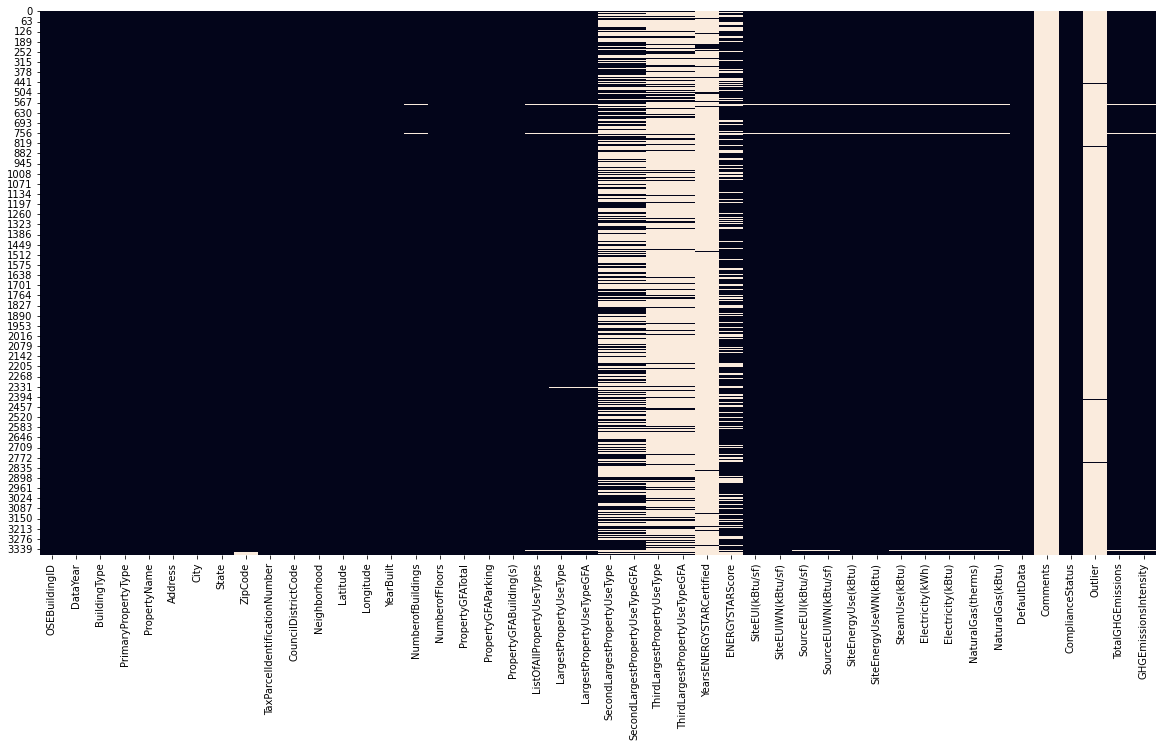

In [39]:
# Heatmap des valeurs manquantes

plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [40]:
# **Répartition des données entre les variables des colonnes**

def graphe_remplissage_variable(df):
  # Répartition du taux de remplissage des colonnes: 
    df = pd.DataFrame(round(df.shape[0] - df.isna().sum())/df.shape[0],
                    columns=['Taux de remplissage']).sort_values('Taux de remplissage', 
                                                                 ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(20,12))
    sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
    plt.title('Taux de remplissage des variables en %\n', fontsize = 15)
    plt.show()

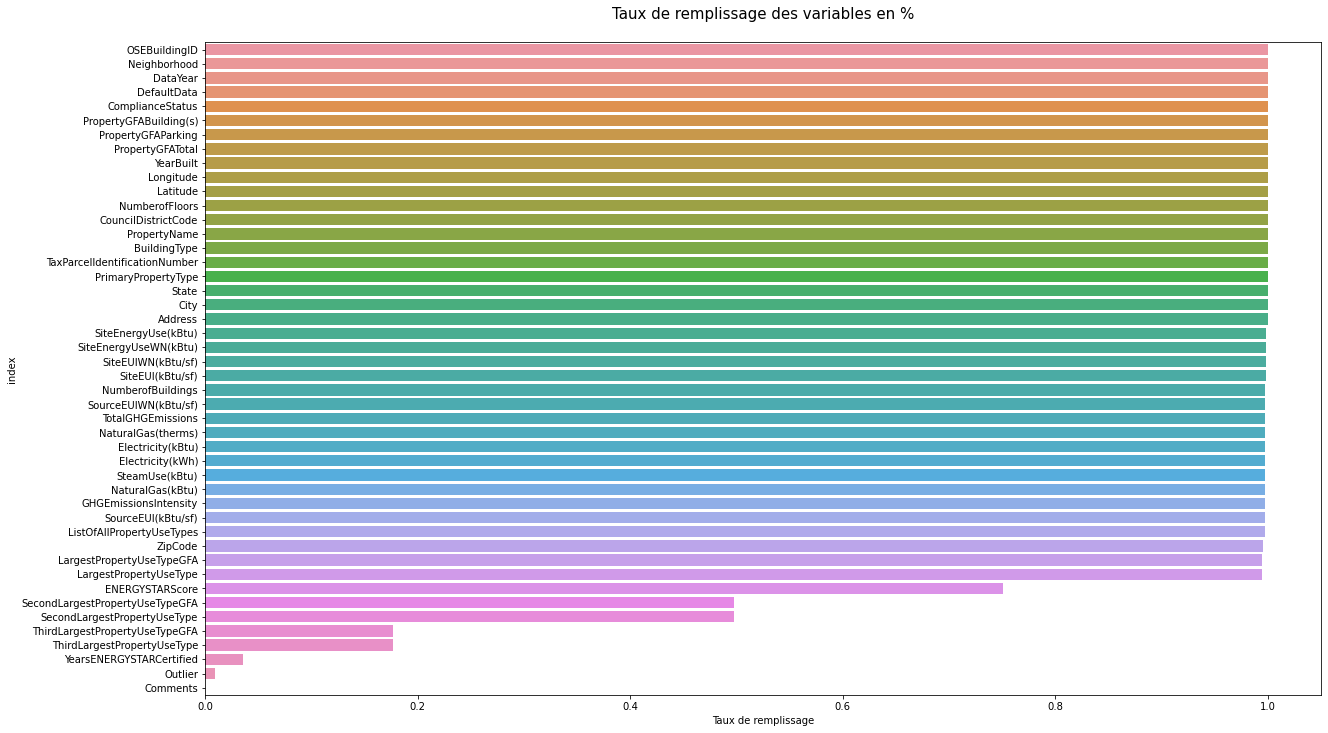

In [41]:
graphe_remplissage_variable(df)

L'on remarque qu'il y a quelques données manquantes dans notre jeu de données. Certaines colonnes sont à moitié vides, certaines sont très peu remplies alors que d'autres sont complètes. Les graphiques ci-dessus nous permettentr de voir globalement la répartition des données manquantes.  Et la les fonctions développées nous on permis de calculer avec précision le taux de données manquantes dans le jeu de données qui est de **12.85%**

<p class="h2"; style="color:green">Traitements des valeurs manquantes </p>

---> **1. Restriction des données aux batiment de type non-ressidentiel** : 

Etant données que le projet ne concerne que les bâtiment non résidentiels, il faut donc se séparer des observations qui concernent les bâtiments résidentiels. Nous allons effectuer un premier filtre sur notre jeu de données en conséquence en ne consrervant que les bulding type de type non-residentiel.



In [42]:
df = data.copy()

In [43]:
# Fonction permetant de réprésenter la distribution statistique des variables catégorielles

def distrib_statistique(df, col):
    effectifs = df[col].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [col]) # création du tableau à partir des modalités
    tab["n : Effectifs"] = effectifs.values  # n = Absolute Frequency = effectifs
    tab = tab.sort_values(by='n : Effectifs') # tri des valeurs de la variable X (croissant)
    tab["f : Relative freq. (%)"] = 100*(tab["n : Effectifs"] / len(df)).round(2) # f=relative freq len(data) ->len échan.
    tab["F : Cumulatif freq. (%)"] = tab["f : Relative freq. (%)"].cumsum() # cumsum calcule la somme cumulée
    
    return tab

In [44]:
distrib_statistique(df, col="BuildingType")

BuildingType  n : Effectifs  f : Relative freq. (%)  \
7     Nonresidential WA              1                     0.0   
6                Campus             24                     1.0   
5    Nonresidential COS             85                     3.0   
4     SPS-District K-12             98                     3.0   
3  Multifamily HR (10+)            110                     3.0   
2  Multifamily MR (5-9)            580                    17.0   
1  Multifamily LR (1-4)           1018                    30.0   
0        NonResidential           1460                    43.0   

   F : Cumulatif freq. (%)  
7                      0.0  
6                      1.0  
5                      4.0  
4                      7.0  
3                     10.0  
2                     27.0  
1                     57.0  
0                    100.0

In [45]:
#len(buildingType_toPlot)

Text(0.5, 1.0, 'Répartition/Distribution du BuildingType')

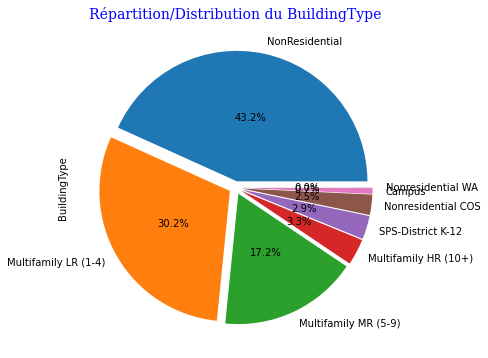

In [46]:
buildingType_toPlot = df['BuildingType'].value_counts()

font = {'family': 'serif', 'color':  'blue', 'weight': 'normal','size': 14}

#fontdict=font


pie, ax = plt.subplots(figsize=[10,6])
buildingType_toPlot.plot.pie(autopct="%.1f%%",explode=[0.05]* len(buildingType_toPlot), 
                             pctdistance=0.5)
plt.title("Répartition/Distribution du BuildingType", fontdict=font)

In [47]:
df[df['BuildingType'] == "Nonresidential WA"]
#df[df['BuildingType'] == "Nonresidential COS"].head(5)

OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
3359          50101      2016  Nonresidential WA          University   

      PropertyName               Address     City State  ZipCode  \
3359  Burke Museum  4331 Memorial Way NE  Seattle    WA  98195.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3359                    1625049001                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3359  47.66127 -122.31256       1962                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3359             68072                   0                   68072   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3359        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3359                    68916.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
3359                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
3359              NaN         46.200001           46.200001   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
3359          144.899994            144.899994           3180819.25   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3359             3180819.25             0.0       932244.6875   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3359          3180819.0                 0.0               0.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
3359       NaN        Compliant     NaN              22.17   

      GHGEmissionsIntensity  
3359                   0.33

In [48]:
df = df.replace('Nonresidential WA','Campus')

In [49]:
df.iloc[3359]['BuildingType']

'Campus'

In [50]:
distrib_statistique(df, col="BuildingType")

BuildingType  n : Effectifs  f : Relative freq. (%)  \
6                Campus             25                     1.0   
5    Nonresidential COS             85                     3.0   
4     SPS-District K-12             98                     3.0   
3  Multifamily HR (10+)            110                     3.0   
2  Multifamily MR (5-9)            580                    17.0   
1  Multifamily LR (1-4)           1018                    30.0   
0        NonResidential           1460                    43.0   

   F : Cumulatif freq. (%)  
6                      1.0  
5                      4.0  
4                      7.0  
3                     10.0  
2                     27.0  
1                     57.0  
0                    100.0

In [51]:
# Liste des catégories de batiment de type non residential
NonResidential_row = ['NonResidential', 'Nonresidential COS',
                      'SPS-District K-12', 'Campus' ]

In [52]:
#Filitrage des bâtiments contenu la liste du jeu de données

df_NonResidential = df.loc[df['BuildingType'].isin(NonResidential_row)]
print_proportion_nan(df_NonResidential)
print("\nLe nombre de batiment non residentiel est de :", df_NonResidential.shape[0])
df_NonResidential.head()

Taille du jeu de données :  (1668, 46)
 --> Proportion de NaN : 12.75%

Le nombre de batiment non residentiel est de : 1668


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [53]:
nb_row_deleted = df.shape[0] - df_NonResidential.shape[0]
percent_deleted = (nb_row_deleted / df.shape[0])* 100

print("Observations supprimées :", nb_row_deleted)
print("  Soit près de " + str(percent_deleted) +  "% du jeu de données initial") 

Observations supprimées : 1708
  Soit près de 50.59241706161137% du jeu de données initial


In [54]:
df1 = df_NonResidential.copy()

In [55]:
print("\nNombre de batiment non residentiel :", df1.shape[0])


Nombre de batiment non residentiel : 1668


Le nombre de batiments non residentiel est de 1668 soit un peu moins de 50% du jeu de données initial


**----> 2. Suppression des colonnes qui ont un taux de données manquantes supérieures à une limite**

Restriction aux colonnes ayant un taux de remplissage >= 20% Observation (utilisation de missigno et seaborn), en effet, certaines colonnes contiennent très peu de données voir aucune.

- La colonne **outlier** nous a permis de faire une pré-analyse des valeurs abberante et peut donc être supprimé.

- La colonne **Comments** ne contient aucune donnée et peut etre supprimé également

In [56]:
df_nan50_filtered = df1.loc[:, (1 - df.isnull().mean()) >=.20]
print_proportion_nan(df_nan50_filtered)
df_nan50_filtered.head()

Taille du jeu de données :  (1668, 41)
 --> Proportion de NaN : 3.31%


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  

In [57]:
nb_col_deleted = df1.shape[1] - df_nan50_filtered.shape[1]

print("Nombre de Variables supprimées :", nb_col_deleted)

Nombre de Variables supprimées : 5


In [58]:
df2 = df_nan50_filtered
df2.shape

(1668, 41)

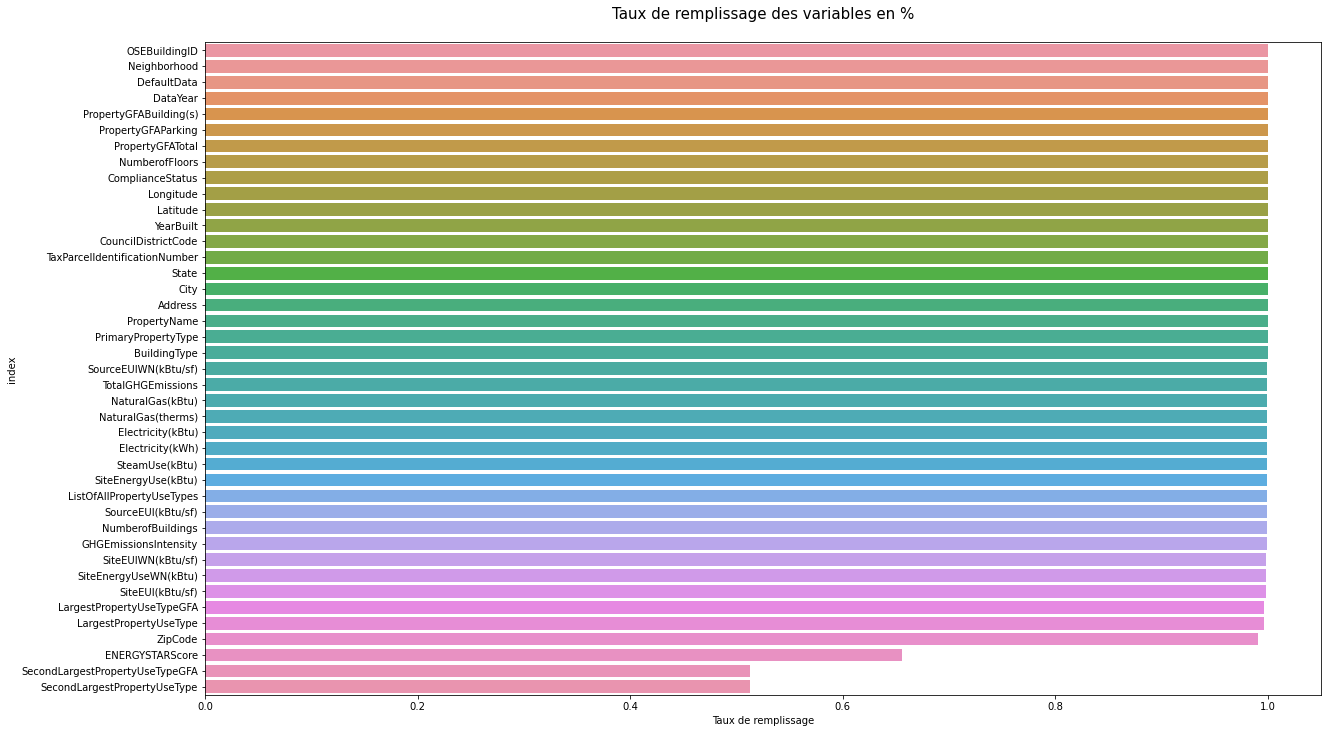

In [59]:
graphe_remplissage_variable(df2)

In [60]:
print(len(df2.columns))
df2.columns

41


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [61]:
df2.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  

In [62]:
df2["DefaultData"].value_counts()
#df2["CouncilDistrictCode"].value_counts()

False    1580
True       88
Name: DefaultData, dtype: int64

**---->3. Suppression des colonnes redondantes et non pertinentes pour l'analyse**

Les 41 variables restantes peuvent être regroupées en grands domaines. On peut dire, entre-autre, que des variables traitent le **thème de l'énergie**, de l'**émission de CO2** et d'autres des informations générales sur le bâtiment, sa localisation et de l'administration publique.

Au vu de notre problématique, il ne faut garder que les variables traitant des domaines de l'énergie, de l'émission de CO2 et les informations sur le bâtiment et sa localisation. De plus, certaines variables traitent du même sujet mais avec des unités de mesure différentes. Il faut donc choisir les variables de façon à avoir la même unité de mesure.
Par example : 
- "Electricity(kBtu)" et "Electricity(kWh)"
- "NaturalGas(therms)" et "NaturalGas(kBtu)"
- "SiteEUI(kBtu/sf)" et "SiteEUIWN(kBtu/sf)"
- "SiteEnergyUse(kBtu)" et "SiteEnergyUseWN(kBtu)"
- "SourceEUI(kBtu/sf)" et "SourceEUIWN(kBtu/sf)"
- "TotalGHGEmissions" et "GHGEmissionsIntensity"
- "PropertyGFATotal" et "PropertyGFAParking","PropertyGFABuilding(s)"


- Etant données que les valeurs contenus dans les **SecondLargestPropertyUseType** et **ThirdLargestPropertyUseTypeGFA** sont déjà représentes sur d'autres variables, nous pouvons nous permettre de nous en séparé d'autant plus que celles-ci contiennent plusiuers valeurs manquantes


- Zipcode et Address sont supprimé car la latitude et la longitude sont suffisant pour la localisation
- City et state  également supprimé --> identique pour toutes les observations (non pertinent pour l'analyse)


Cette Hypothèse peut-etre validé à l'aide d'une matrice de corrélation, les données ayant une forte correlation entre elles porte la meme information.

In [63]:
cols_redondates = ["Electricity(kWh)", "NaturalGas(therms)", "SiteEUIWN(kBtu/sf)", 
                   "SourceEUIWN(kBtu/sf)", "SiteEnergyUseWN(kBtu)",
                  "SecondLargestPropertyUseType", "SecondLargestPropertyUseTypeGFA",  
                  ]

cols_non_pertinentes = ['OSEBuildingID','City', 'State','ZipCode', 'Address', "DefaultData", 'CouncilDistrictCode',
                        'TaxParcelIdentificationNumber', 'ComplianceStatus']

In [64]:
# Matrice de correlation des variables quantitatives

df2.corr().style.background_gradient(cmap='coolwarm')

/Users/awf/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/awf/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Text(0.5, 1.0, 'Coefficients de corrélation de Pearson\n')

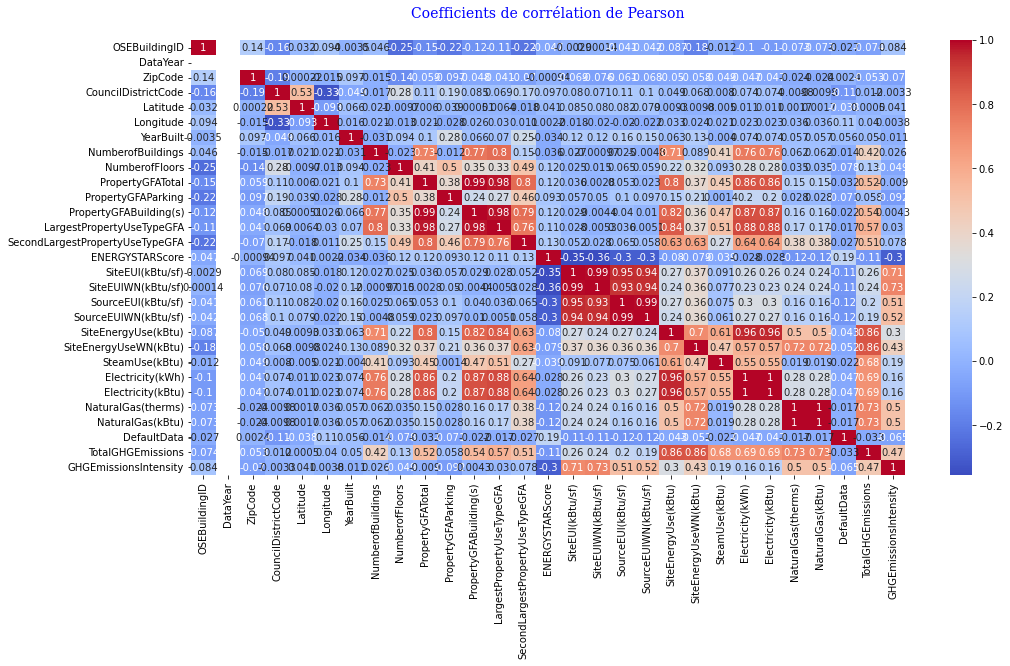

In [65]:
# Heatmap de correlation pour confirmer notre intuition sur les variables redondantes 
    ## qui sont très correlés entre elles

import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm").set_title('HeatMap')
plt.title("Coefficients de corrélation de Pearson\n", fontdict=font)

In [66]:
cols_redondates
cols_non_pertinentes

['OSEBuildingID',
 'City',
 'State',
 'ZipCode',
 'Address',
 'DefaultData',
 'CouncilDistrictCode',
 'TaxParcelIdentificationNumber',
 'ComplianceStatus']

In [67]:
df_cols_toDrop = df2.drop(columns = cols_redondates + cols_non_pertinentes)
print_proportion_nan(df_cols_toDrop)

Taille du jeu de données :  (1668, 25)
 --> Proportion de NaN : 1.46%


In [68]:
df3 = df_cols_toDrop

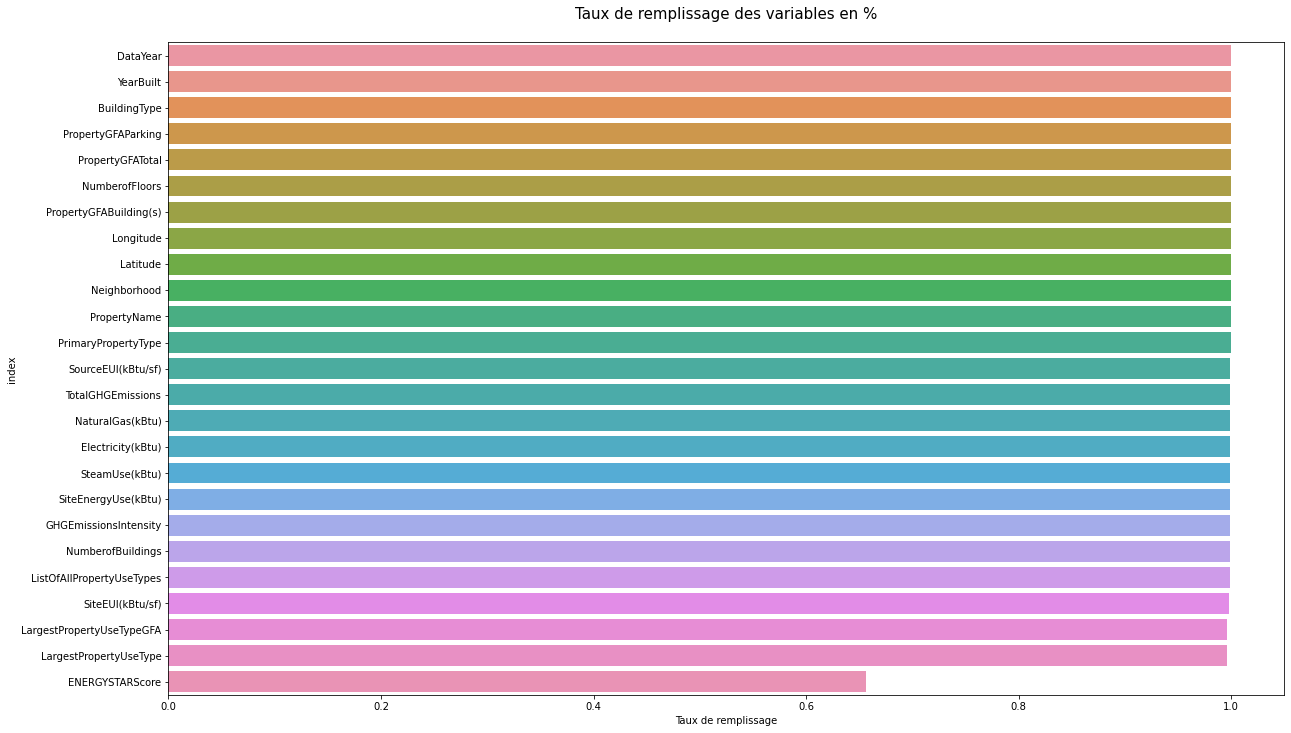

In [69]:
graphe_remplissage_variable(df3)

**---->4. Suppression Suppression des Nan pour nos targer et features variables**

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment (**SiteEnergyUse(kBtu**)) et ses émissions de CO2 (**TotalGHGEmissions**). Certaines lignes comportent des manquants sur ces variables, 


Afin de s'assurer que nous n'utiliserons que des données dont nous savez qu'elles sont absolument correctes, nous allons donc supprimer les lignes colonnes contenant des valeurs nulles à l'aide de la méthode dropna. Dans ce cas, nous supprimerons les lignes (axe 0 du DataFrame) où l'une des colonnes contient des valeurs nulles.

In [70]:
df3.isnull().sum().sort_values(ascending=False)

ENERGYSTARScore              574
LargestPropertyUseTypeGFA      6
LargestPropertyUseType         6
SiteEUI(kBtu/sf)               3
GHGEmissionsIntensity          2
ListOfAllPropertyUseTypes      2
TotalGHGEmissions              2
NaturalGas(kBtu)               2
Electricity(kBtu)              2
SteamUse(kBtu)                 2
SiteEnergyUse(kBtu)            2
SourceEUI(kBtu/sf)             2
NumberofBuildings              2
DataYear                       0
BuildingType                   0
PropertyGFAParking             0
PropertyGFATotal               0
NumberofFloors                 0
YearBuilt                      0
Longitude                      0
Latitude                       0
Neighborhood                   0
PropertyName                   0
PrimaryPropertyType            0
PropertyGFABuilding(s)         0
dtype: int64

In [71]:
cols_with_NAN = ['LargestPropertyUseTypeGFA', 'LargestPropertyUseType', "SiteEnergyUse(kBtu)",
                 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity','ListOfAllPropertyUseTypes', 'TotalGHGEmissions',
                 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SourceEUI(kBtu/sf)', 'NumberofBuildings'
                ]

In [72]:
#df3.columns != "ENERGYSTARScore"
cols_not_energyscore = [col for col in cols_with_NAN if col != "ENERGYSTARScore"]

In [73]:
#df = df.dropna(axis=0, how='any')


df_dropNAN = df3.dropna(subset=cols_with_NAN, axis=0, how='any', inplace=False)

print_proportion_nan(df_dropNAN )
df_dropNAN.isnull().sum().sort_values(ascending=False)

Taille du jeu de données :  (1661, 25)
 --> Proportion de NaN : 1.37%


ENERGYSTARScore              569
DataYear                       0
ListOfAllPropertyUseTypes      0
TotalGHGEmissions              0
NaturalGas(kBtu)               0
Electricity(kBtu)              0
SteamUse(kBtu)                 0
SiteEnergyUse(kBtu)            0
SourceEUI(kBtu/sf)             0
SiteEUI(kBtu/sf)               0
LargestPropertyUseTypeGFA      0
LargestPropertyUseType         0
PropertyGFABuilding(s)         0
BuildingType                   0
PropertyGFAParking             0
PropertyGFATotal               0
NumberofFloors                 0
NumberofBuildings              0
YearBuilt                      0
Longitude                      0
Latitude                       0
Neighborhood                   0
PropertyName                   0
PrimaryPropertyType            0
GHGEmissionsIntensity          0
dtype: int64

In [74]:
df4 = df_dropNAN.copy()

<p class="h2"; style="color:green">Traitements des Outliers / Valeurs abbérante </p>

In [75]:
df4.sort_values(by='SiteEnergyUse(kBtu)', ascending=False).head()

DataYear    BuildingType PrimaryPropertyType  \
3274      2016          Campus          University   
35        2016          Campus  Mixed Use Property   
170       2016  NonResidential            Hospital   
618       2016  NonResidential            Hospital   
558       2016  NonResidential               Other   

                                   PropertyName      Neighborhood   Latitude  \
3274  University of Washington - Seattle Campus         NORTHEAST  47.656440   
35                                 Plant 2 Site  GREATER DUWAMISH  47.534930   
170                   Harborview Medical Center              EAST  47.603990   
618                          Swedish First Hill              EAST  47.608951   
558                              WestinBuilding          DOWNTOWN  47.614380   

       Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3274 -122.310410       1900              111.0               0   
35   -122.317880       1992                1.0               3   
170  -122.323770       2000                9.0               8   
618  -122.322402       1994                7.0              14   
558  -122.338710       1981                1.0              33   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3274           9320156                   0                 9320156   
35              494835                   0                  494835   
170            1158691                   0                 1158691   
618            1765970                   0                 1765970   
558             429405                   0                  429405   

                              ListOfAllPropertyUseTypes  \
3274                                 College/University   
35    Energy/Power Station, Laboratory, Manufacturin...   
170      Hospital (General Medical & Surgical), Parking   
618      Hospital (General Medical & Surgical), Parking   
558                                 Data Center, Office   

                     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3274                     College/University                  9320156.0   
35                                   Office                   757027.0   
170   Hospital (General Medical & Surgical)                  1350182.0   
618   Hospital (General Medical & Surgical)                  1639334.0   
558                             Data Center                   218997.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
3274              NaN         93.800003          246.600006   
35                8.0        221.699997          388.200012   
170              29.0        217.100006          502.899994   
618              54.0        177.899994          377.000000   
558              98.0        639.700012         2007.900024   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
3274          873923712.0      84985240.0        657074389.0   
35            448385312.0             0.0        150476283.0   
170           293090784.0     122575032.0        168683602.0   
618           291614432.0     134943456.0        139354828.0   
558           274682208.0             0.0        274532495.0   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
3274               0.0           11140.56                   1.20  
35         297909000.0           16870.98                  34.09  
170          1832129.0           10734.57                   9.26  
618         17316120.0           12307.16                   6.97  
558           149672.0            1921.82                   4.48

Suppression des deux obervations **anormalement grand** par rapport aux autres.

In [76]:
df4.loc[[3274, 35]][["NumberofBuildings", "LargestPropertyUseTypeGFA", "SiteEnergyUse(kBtu)",
                     "TotalGHGEmissions","GHGEmissionsIntensity","ENERGYSTARScore",
                     "LargestPropertyUseType"                 
                    ]]

NumberofBuildings  LargestPropertyUseTypeGFA  SiteEnergyUse(kBtu)  \
3274              111.0                  9320156.0          873923712.0   
35                  1.0                   757027.0          448385312.0   

      TotalGHGEmissions  GHGEmissionsIntensity  ENERGYSTARScore  \
3274           11140.56                   1.20              NaN   
35             16870.98                  34.09              8.0   

     LargestPropertyUseType  
3274     College/University  
35                   Office

In [77]:
df4.max()

DataYear                                  2016
BuildingType                 SPS-District K-12
PrimaryPropertyType           Worship Facility
PropertyName                      space needle
Neighborhood                         SOUTHWEST
Latitude                              47.73387
Longitude                           -122.25864
YearBuilt                                 2015
NumberofBuildings                        111.0
NumberofFloors                              99
PropertyGFATotal                       9320156
PropertyGFAParking                      512608
PropertyGFABuilding(s)                 9320156
ListOfAllPropertyUseTypes     Worship Facility
LargestPropertyUseType        Worship Facility
LargestPropertyUseTypeGFA            9320156.0
ENERGYSTARScore                          100.0
SiteEUI(kBtu/sf)                    834.400024
SourceEUI(kBtu/sf)                      2620.0
SiteEnergyUse(kBtu)                873923712.0
SteamUse(kBtu)                     134943456.0
Electricity(k

In [78]:
update_df4 = df4.drop([3274, 35]) 

In [79]:
update_df4.max()

DataYear                                  2016
BuildingType                 SPS-District K-12
PrimaryPropertyType           Worship Facility
PropertyName                      space needle
Neighborhood                         SOUTHWEST
Latitude                              47.73387
Longitude                           -122.25864
YearBuilt                                 2015
NumberofBuildings                         27.0
NumberofFloors                              99
PropertyGFATotal                       2200000
PropertyGFAParking                      512608
PropertyGFABuilding(s)                 2200000
ListOfAllPropertyUseTypes     Worship Facility
LargestPropertyUseType        Worship Facility
LargestPropertyUseTypeGFA            1719643.0
ENERGYSTARScore                          100.0
SiteEUI(kBtu/sf)                    834.400024
SourceEUI(kBtu/sf)                      2620.0
SiteEnergyUse(kBtu)                293090784.0
SteamUse(kBtu)                     134943456.0
Electricity(k

<AxesSubplot:>

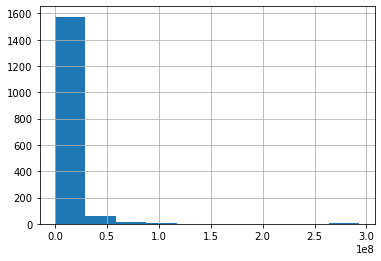

In [80]:
update_df4['SiteEnergyUse(kBtu)'].hist()

Certains bâtiments sont indiqués comme ayant une **consommation énergétique nulle / négative**, et / ou des **émissions carbone nulles**. Il s'agit soit de bâtiments désaffectés, soit d'erreurs. Nous allons donc les supprimer du jeu de données.

In [81]:
update_df4[update_df4['SiteEnergyUse(kBtu)'] == 0]

DataYear       BuildingType PrimaryPropertyType  \
28        2016  SPS-District K-12         K-12 School   
31        2016  SPS-District K-12         K-12 School   
62        2016  SPS-District K-12         K-12 School   
81        2016  SPS-District K-12         K-12 School   
85        2016  SPS-District K-12         K-12 School   
95        2016  SPS-District K-12         K-12 School   
133       2016  SPS-District K-12         K-12 School   
139       2016  SPS-District K-12         K-12 School   
152       2016  SPS-District K-12         K-12 School   
614       2016  SPS-District K-12         K-12 School   
630       2016  SPS-District K-12         K-12 School   
746       2016     NonResidential               Other   
1361      2016  SPS-District K-12         K-12 School   
1894      2016  SPS-District K-12         K-12 School   
3166      2016  SPS-District K-12         K-12 School   

                        PropertyName           Neighborhood  Latitude  \
28                    Meany Building                Central  47.62266   
31               John Hay Elementary  MAGNOLIA / QUEEN ANNE  47.63290   
62          Arbor Heights Elementary              SOUTHWEST  47.50970   
81                    Pathfinder K-8               DELRIDGE  47.56360   
85              John Muir Elementary              SOUTHEAST  47.57324   
95               B.F. Day Elementary             LAKE UNION  47.65464   
133                   Whitman Middle                BALLARD  47.69675   
139                Washington Middle                CENTRAL  47.59796   
152          Olympic View Elementary                  NORTH  47.69823   
614        Bailey Gatzert Elementary                CENTRAL  47.60120   
630                Leschi Elementary                CENTRAL  47.60210   
746   Welcome Home Society - PriceCo              NORTHWEST  47.72777   
1361        Olympic Hills Elementary                  NORTH  47.72369   
1894          North Beach Elementary                BALLARD  47.69497   
3166            Catharine Blaine K-8  MAGNOLIA / QUEEN ANNE  47.64342   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
28   -122.30547       1955                1.0               1   
31   -122.35172       1989                1.0               2   
62   -122.37759       1948                1.0               2   
81   -122.35800       1999                1.0               3   
85   -122.29058       1991                1.0               2   
95   -122.34912       1991                1.0               3   
133  -122.37760       1959                1.0               1   
139  -122.30415       1963                1.0               3   
152  -122.32126       1989                1.0               2   
614  -122.31548       1988                1.0               1   
630  -122.29181       1988                1.0               3   
746  -122.34503       2002                1.0               1   
1361 -122.30676       1954                1.0               1   
1894 -122.38704       1958                1.0               1   
3166 -122.39970       1952                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
28              126351                   0                  126351   
31               51582                   0                   51582   
62               53352                   0                   53352   
81               74468                   0                   74468   
85               58933                   0                   58933   
95               66588                   0                   66588   
133             160270                   0                  160270   
139             136188                   0                  136188   
152              52792                   0                   52792   
614              52924                   0                   52924   
630              55353                   0                   55353   
746              29924                   0 

In [82]:
update_df4[update_df4['TotalGHGEmissions'] <= 0]

DataYear       BuildingType          PrimaryPropertyType  \
28        2016  SPS-District K-12                  K-12 School   
152       2016  SPS-District K-12                  K-12 School   
513       2016     NonResidential  Supermarket / Grocery Store   
746       2016     NonResidential                        Other   
1361      2016  SPS-District K-12                  K-12 School   
3206      2016     NonResidential  Small- and Mid-Sized Office   

                        PropertyName           Neighborhood  Latitude  \
28                    Meany Building                Central  47.62266   
152          Olympic View Elementary                  NORTH  47.69823   
513        IUC- Whole Foods Interbay  MAGNOLIA / QUEEN ANNE  47.63718   
746   Welcome Home Society - PriceCo              NORTHWEST  47.72777   
1361        Olympic Hills Elementary                  NORTH  47.72369   
3206                  Bullitt Center                CENTRAL  47.61432   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
28   -122.30547       1955                1.0               1   
152  -122.32126       1989                1.0               2   
513  -122.37734       2008                1.0               1   
746  -122.34503       2002                1.0               1   
1361 -122.30676       1954                1.0               1   
3206 -122.31257       2013                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
28              126351                   0                  126351   
152              52792                   0                   52792   
513              57176                   0                   57176   
746              29924                   0                   29924   
1361             42292                   0                   42292   
3206             52000                   0                   52000   

                              ListOfAllPropertyUseTypes  \
28                                          K-12 School   
152                                         K-12 School   
513   Personal Services (Health/Beauty, Dry Cleaning...   
746                                   Other - Education   
1361                                        K-12 School   
3206                                             Office   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
28                  K-12 School                   126351.0              NaN   
152                 K-12 School                    55480.0              NaN   
513   Supermarket/Grocery Store                    39500.0             31.0   
746           Other - Education                    29924.0              NaN   
1361                K-12 School                    43188.0            100.0   
3206                     Office                    48159.0            100.0   

      SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
28            0.000000                 0.0         0.000000e+00   
152           0.000000                 0.0         0.000000e+00   
513         208.800003                 0.0         1.252517e+07   
746           0.000000                 0.0         0.000000e+00   
1361          0.000000                 0.0         0.000000e+00   
3206          7.100000                 2.0         3.427261e+05   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
28               0.0                0.0               0.0                0.0   
152              0.0                0.0               0.0                0.0   
513              0.0                0.0               0.0                0.0   
746              0.0                0.0               0.0                0.0   
1361             0.0                0.0               0.0                0.0   
3206             0.0          -115417.0               0.0               -0.8   

      GHGEmissionsIntensity  
28                     0.00  
152                    0.

In [83]:
update_df4.min()

DataYear                                    2016
BuildingType                              Campus
PrimaryPropertyType          Distribution Center
PropertyName                    #4706 Bitterlake
Neighborhood                             BALLARD
Latitude                                47.49917
Longitude                             -122.41182
YearBuilt                                   1900
NumberofBuildings                            0.0
NumberofFloors                                 0
PropertyGFATotal                           11285
PropertyGFAParking                             0
PropertyGFABuilding(s)                      3636
ListOfAllPropertyUseTypes        Adult Education
LargestPropertyUseType           Adult Education
LargestPropertyUseTypeGFA                 5656.0
ENERGYSTARScore                              1.0
SiteEUI(kBtu/sf)                             0.0
SourceEUI(kBtu/sf)                           0.0
SiteEnergyUse(kBtu)                          0.0
SteamUse(kBtu)      

In [84]:
# On conserve uniquement les bâtiments dont la consommation totale d'énergie est > 0
df_no_outliers = update_df4[update_df4["SiteEnergyUse(kBtu)"]>0]

# Ne conserver que les bâtiments avec des émissions de carbone > 0
df_no_outliers = df_no_outliers[df_no_outliers["TotalGHGEmissions"]>0]

In [85]:
df_no_outliers.shape

(1642, 25)

In [86]:
print("  - Nombre d'observations supprimés :", df4.shape[0] - df_no_outliers.shape[0])

  - Nombre d'observations supprimés : 19


In [87]:
df_no_outliers.head()

DataYear    BuildingType PrimaryPropertyType                 PropertyName  \
0      2016  NonResidential               Hotel         Mayflower park hotel   
1      2016  NonResidential               Hotel              Paramount Hotel   
2      2016  NonResidential               Hotel      5673-The Westin Seattle   
3      2016  NonResidential               Hotel                    HOTEL MAX   
4      2016  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN  47.61220 -122.33799       1927                1.0   
1     DOWNTOWN  47.61317 -122.33393       1996                1.0   
2     DOWNTOWN  47.61393 -122.33810       1969                1.0   
3     DOWNTOWN  47.61412 -122.33664       1926                1.0   
4     DOWNTOWN  47.61375 -122.34047       1980                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   
3              10             61320                   0   
4              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                  Hotel                    88434.0             60.0   
1                  Hotel                    83880.0             61.0   
2                  Hotel                   756493.0             43.0   
3                  Hotel                    61320.0             56.0   
4                  Hotel                   123445.0             75.0   

   SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0         81.699997          182.500000            7226362.5      2003882.00   
1         94.800003          176.100006            8387933.0            0.00   
2         96.000000          241.899994           72587024.0     21566554.00   
3        110.800003          216.199997            6794584.0      2214446.25   
4        114.800003          211.399994           14172606.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   
1          3242851.0         5145082.0             295.86   
2         49526664.0         1493800.0            2089.28   
3          2768924.0         1811213.0             286.43   
4          5368607.0         8803998.0             505.01   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19  
3                   4.67  
4                   2.88

<p class="h2"; style="color:green">Exploration des données du DataFrame nettoyé </p>

Maintenant que nous avons nettoyé les valeurs manquantes et traité les valeurs abbérantes, nous sommes prêts à explorer les données dans le DataFrame. Commençons par une analyse uni-variée de nos données


<p class="h3"; style="color:red">Statistiques descriptives et distribution des données - Univarié</p>


Lors de l'examen d'une variable (par exemple, la consommation total d'énergie ), nous intéresseront particulièrement à sa distribution (en d'autres termes, comment les différentes valeurs des observations sont réparties dans l'échantillon). Le point de départ de cette exploration consistera donc à visualiser les données sous forme d'histogramme et à voir à quelle fréquence chaque valeur de la variable se produit.

In [88]:
df5 = df_no_outliers.copy()

In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DataYear                   1642 non-null   int64  
 1   BuildingType               1642 non-null   object 
 2   PrimaryPropertyType        1642 non-null   object 
 3   PropertyName               1642 non-null   object 
 4   Neighborhood               1642 non-null   object 
 5   Latitude                   1642 non-null   float64
 6   Longitude                  1642 non-null   float64
 7   YearBuilt                  1642 non-null   int64  
 8   NumberofBuildings          1642 non-null   float64
 9   NumberofFloors             1642 non-null   int64  
 10  PropertyGFATotal           1642 non-null   int64  
 11  PropertyGFAParking         1642 non-null   int64  
 12  PropertyGFABuilding(s)     1642 non-null   int64  
 13  ListOfAllPropertyUseTypes  1642 non-null   objec

#### Analyse descriptive des variables quantitatives

In [90]:
quant_cols = [col for col in df5.select_dtypes(include=['float'])]
quant_cols

['Latitude',
 'Longitude',
 'NumberofBuildings',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [91]:
# num cols = [col for col in df5.columns 
# df5.select_dtypes(include=['float']).columns:

col_analysis = ["LargestPropertyUseTypeGFA", "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "NumberofBuildings"]

for col in col_analysis:
    calc_mean = np.mean(df5[col])
    calc_median= np.median(df5[col])
    calc_min = np.min(df5[col])
    calc_max = np.max(df5[col])
    
    print(col+"\n" + " - Mean: {:.3f}\n - Median: {:.3f}\n - Min: {:.3f}\n - Max: {:.3f}".
          format(calc_mean, calc_median, calc_mean, calc_max))

LargestPropertyUseTypeGFA
 - Mean: 92427.786
 - Median: 43462.500
 - Min: 92427.786
 - Max: 1719643.000
SiteEnergyUse(kBtu)
 - Mean: 7740412.428
 - Median: 2584401.500
 - Min: 7740412.428
 - Max: 293090784.000
TotalGHGEmissions
 - Mean: 169.979
 - Median: 49.845
 - Min: 169.979
 - Max: 12307.160
NumberofBuildings
 - Mean: 1.104
 - Median: 1.000
 - Min: 1.104
 - Max: 27.000


In [92]:
describe = df5.describe().T
col_syle = ['count', 'mean', 'min', 'max']

# .applymap("{0:.2f}".format)
describe[col_syle] = describe[col_syle].applymap("{:,.0f}".format)
describe

count       mean           std     min  \
DataYear                   1,642      2,016  0.000000e+00   2,016   
Latitude                   1,642         48  4.805706e-02      47   
Longitude                  1,642       -122  2.444836e-02    -122   
YearBuilt                  1,642      1,962  3.273818e+01   1,900   
NumberofBuildings          1,642          1  1.167402e+00       0   
NumberofFloors             1,642          4  6.608164e+00       0   
PropertyGFATotal           1,642    112,944  1.925010e+05  11,285   
PropertyGFAParking         1,642     13,102  4.257666e+04       0   
PropertyGFABuilding(s)     1,642     99,842  1.706753e+05   3,636   
LargestPropertyUseTypeGFA  1,642     92,428  1.574188e+05   5,656   
ENERGYSTARScore            1,088         65  2.844153e+01       1   
SiteEUI(kBtu/sf)           1,642         73  7.404436e+01       1   
SourceEUI(kBtu/sf)         1,642        178  1.862541e+02       0   
SiteEnergyUse(kBtu)        1,642  7,740,412  1.877076e+07  16,809   
SteamUse(kBtu)             1,642    468,307  5.147256e+06       0   
Electricity(kBtu)          1,642  5,424,527  1.292771e+07       0   
NaturalGas(kBtu)           1,642  1,807,852  5.970654e+06       0   
TotalGHGEmissions          1,642        170  5.747781e+02       0   
GHGEmissionsIntensity      1,642          2  2.208198e+00       0   

                                    25%           50%           75%  \
DataYear                   2.016000e+03  2.016000e+03  2.016000e+03   
Latitude                   4.758528e+01  4.761233e+01  4.764940e+01   
Longitude                 -1.223431e+02 -1.223330e+02 -1.223218e+02   
YearBuilt                  1.930000e+03  1.965000e+03  1.989000e+03   
NumberofBuildings          1.000000e+00  1.000000e+00  1.000000e+00   
NumberofFloors             1.000000e+00  2.000000e+00  4.000000e+00   
PropertyGFATotal           2.938300e+04  4.892450e+04  1.049922e+05   
PropertyGFAParking         0.000000e+00  0.000000e+00  0.000000e+00   
PropertyGFABuilding(s)     2.830525e+04  4.679850e+04  9.449300e+04   
LargestPropertyUseTypeGFA  2.548025e+04  4.346250e+04  9.161675e+04   
ENERGYSTARScore            4.875000e+01  7.300000e+01  8.900000e+01   
SiteEUI(kBtu/sf)           3.412500e+01  5.210000e+01  8.185000e+01   
SourceEUI(kBtu/sf)         7.792500e+01  1.315500e+02  2.044750e+02   
SiteEnergyUse(kBtu)        1.257219e+06  2.584402e+06  6.961781e+06   
SteamUse(kBtu)             0.000000e+00  0.000000e+00  0.000000e+00   
Electricity(kBtu)          7.270342e+05  1.619046e+06  4.897033e+06   
NaturalGas(kBtu)           0.000000e+00  5.052475e+05  1.522715e+06   
TotalGHGEmissions          2.036250e+01  4.984500e+01  1.423825e+02   
GHGEmissionsIntensity      3.525000e-01  8.800000e-01  1.907500e+00   

                                   max  
DataYear                         2,016  
Latitude                            48  
Longitude                         -122  
YearBuilt                        2,015  
NumberofBuildings                   27  
NumberofFloors                      99  
PropertyGFATotal             2,200,000  
PropertyGFAParking             512,608  
PropertyGFABuilding(s)       2,200,000  
LargestPropertyUseTypeGFA    1,719,643  
ENERGYSTARScore                    100  
SiteEUI(kBtu/sf)                   834  
SourceEUI(kBtu/sf)               2,620  
SiteEnergyUse(kBtu)        293,090,784  
SteamUse(kBtu)             134,943,456  
Electricity(kBtu)          274,532,495  
NaturalGas(kBtu)           138,191,238  
TotalGHGEmissions               12,307  
GHGEmissionsIntensity               26

In [93]:
df5.describe().T.style.format({'count':"{:.0f}",
                               'mean': '{:,.1f}',
                               'std': '{:,.2f}',
                               'min': '{:,.2f}',
                               '25%': '{:,.2f}',
                               '50%': '{:,.2f}',
                               '75%': '{:,.2f}',
                               'max': '{:,.2f}',         
                              })

In [94]:
# Synthèse structure des données 

def data_set_struture(df):
    
    type_of_variable = df.dtypes.value_counts()
    
    Nombre_variables_numeriques = type_of_variable[type_of_variable.index=='float64'][0]+\
                             type_of_variable[type_of_variable.index=='int64'][0]
    
    dict_structure = {'Nombre de lignes':df.shape[0], 'Nombre de colonnes':int(df.shape[1]), 
                  'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                  'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                  'Pourcentage de données manquantes':int((df.isnull().sum()/len(df)*100).mean()),
                  'Nombre de doublons':int(len(df[df.duplicated()]))}
    
    structure_df = pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])

    return structure_df 

In [95]:
df_analysis = df5.copy()

In [96]:
data_set_struture(df_analysis)

Caractéristiques  Valeurs
0                   Nombre de lignes     1642
1                 Nombre de colonnes       25
2  Nombre de variables catégorielles        6
3    Nombre de variables numériques        19
4  Pourcentage de données manquantes        1
5                 Nombre de doublons        0

In [97]:
df_analysis.head()

DataYear    BuildingType PrimaryPropertyType                 PropertyName  \
0      2016  NonResidential               Hotel         Mayflower park hotel   
1      2016  NonResidential               Hotel              Paramount Hotel   
2      2016  NonResidential               Hotel      5673-The Westin Seattle   
3      2016  NonResidential               Hotel                    HOTEL MAX   
4      2016  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN  47.61220 -122.33799       1927                1.0   
1     DOWNTOWN  47.61317 -122.33393       1996                1.0   
2     DOWNTOWN  47.61393 -122.33810       1969                1.0   
3     DOWNTOWN  47.61412 -122.33664       1926                1.0   
4     DOWNTOWN  47.61375 -122.34047       1980                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   
3              10             61320                   0   
4              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                  Hotel                    88434.0             60.0   
1                  Hotel                    83880.0             61.0   
2                  Hotel                   756493.0             43.0   
3                  Hotel                    61320.0             56.0   
4                  Hotel                   123445.0             75.0   

   SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0         81.699997          182.500000            7226362.5      2003882.00   
1         94.800003          176.100006            8387933.0            0.00   
2         96.000000          241.899994           72587024.0     21566554.00   
3        110.800003          216.199997            6794584.0      2214446.25   
4        114.800003          211.399994           14172606.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   
1          3242851.0         5145082.0             295.86   
2         49526664.0         1493800.0            2089.28   
3          2768924.0         1811213.0             286.43   
4          5368607.0         8803998.0             505.01   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19  
3                   4.67  
4                   2.88

**Analyse descriptive et étude de la distribution d'une variable quantitative données**

In [98]:
#df_analysis['Longitude'].plot.density()
df_ernergy_filter = df_analysis[df_analysis["SiteEnergyUse(kBtu)"] < 3000000]
print(len(df_analysis))
print(len(df_ernergy_filter))

1642
895


In [99]:
col = "SiteEnergyUse(kBtu)"

Pandas **quantile function** to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

We can therefore eliminate outliers at the upper end of the distribution by defining a threshold at a high percentile value - for example, you can use the quantile function to find the 0.99 percentile below which 99% of the data reside.

In [100]:
# calculate the 0.01th percentile
q01 = df_analysis[col].quantile(0.01)

# Get the variable to examine
df_q01 = df_analysis[df_analysis[col] > q01]
print(len(df_analysis))
print(len(df_q01))
var_supp = df_analysis.shape[0] - df_q01.shape[0]
print("Nombre d'observations supprimé en dessous du 0.01ème percentile : ", var_supp)

1642
1625
Nombre d'observations supprimé en dessous du 0.01ème percentile :  17




Mean = 2640980.25 ----> Median = 7820474.50 ----> Mode = 127374.00
Minimum = 127374.00 ----> Maximum = 293090784.00
Minimum = 127374.00 ----> Maximum = 293090784.00
Var = 355410338985158.88 ----> std = 18852329.80


/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_2027/69413765.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


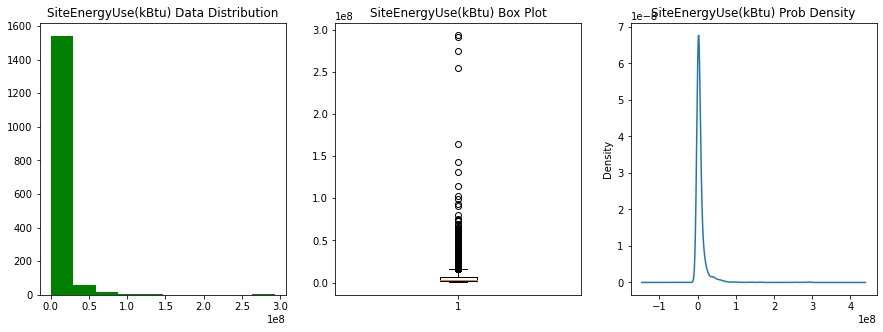

In [101]:
# Get the variable to examine
var_col = "SiteEnergyUse(kBtu)"
var_data = df_q01[var_col] 
rng = var_data.max() - var_data.min()

# Get statistics
print("\n")
print('Mean = {:.2f} ----> Median = {:.2f} ----> Mode = {:.2f}'.format(var_data.median(),
                                                                var_data.mean(),
                                                                var_data.mode()[0],
                                                               ))
print('Minimum = {:.2f} ----> Maximum = {:.2f}'.format(var_data.min(), var_data.max()))

print('Minimum = {:.2f} ----> Maximum = {:.2f}'.format(var_data.min(), var_data.max()))

print('Var = {:.2f} ----> std = {:.2f}'.format(var_data.var(), var_data.std()))
    



# Create a figure for 2 subplots (3 rows, 1 column)
fig, ax = plt.subplots(1, 3, figsize = (15,5))

# Create a Histogramme on the first axis
ax[0].hist(x=var_data, color='green')
ax[0].set_title(var_col + ' Data Distribution')

# Create a Boxplot of our var on the second axis
ax[1].boxplot(var_data)
ax[1].set_title(var_col + " Box Plot")

# Plot density
var_data.plot.density()
ax[2].set_title(var_col + ' Prob Density')

# Show the figure
fig.show()

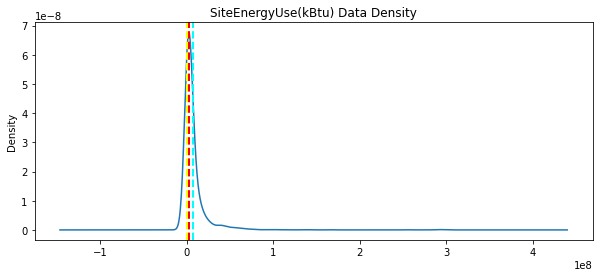

In [102]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(var_col + ' Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade

#var_col = 'Longitude'
#var_data = df_analysis[var_col]

show_density(var_data)



Mean = 50.69 ----> Median = 171.75 ----> Mode = 6.30
Minimum = 0.89 ----> Maximum = 12307.16
Minimum = 0.89 ----> Maximum = 12307.16
Var = 333526.14 ----> std = 577.52


/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_2027/210771925.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


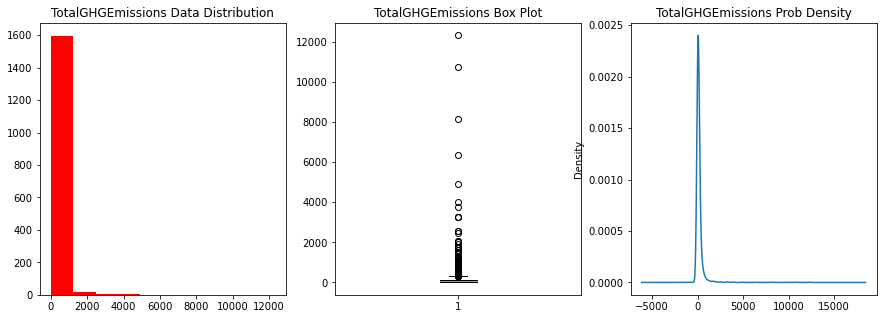

In [103]:
# Get the variable to examine
var_col = "TotalGHGEmissions"
var_data = df_q01[var_col] 
rng = var_data.max() - var_data.min()

# Get statistics
print("\n")
print('Mean = {:.2f} ----> Median = {:.2f} ----> Mode = {:.2f}'.format(var_data.median(),
                                                                var_data.mean(),
                                                                var_data.mode()[0],
                                                               ))
print('Minimum = {:.2f} ----> Maximum = {:.2f}'.format(var_data.min(), var_data.max()))

print('Minimum = {:.2f} ----> Maximum = {:.2f}'.format(var_data.min(), var_data.max()))

print('Var = {:.2f} ----> std = {:.2f}'.format(var_data.var(), var_data.std()))
    



# Create a figure for 2 subplots (3 rows, 1 column)
fig, ax = plt.subplots(1, 3, figsize = (15,5))

# Create a Histogramme on the first axis
ax[0].hist(x=var_data, color='red')
ax[0].set_title(var_col + ' Data Distribution')

# Create a Boxplot of our var on the second axis
ax[1].boxplot(var_data)
ax[1].set_title(var_col + " Box Plot")

# Plot density
var_data.plot.density()
ax[2].set_title(var_col + ' Prob Density')

# Show the figure
fig.show()

**Analyse Univariée des variabbles catégorielle**

In [104]:
df_building_type = df_analysis['BuildingType']
df_building_type.nunique()

4

Text(0.5, 1.0, 'Distribution du BuildingType')

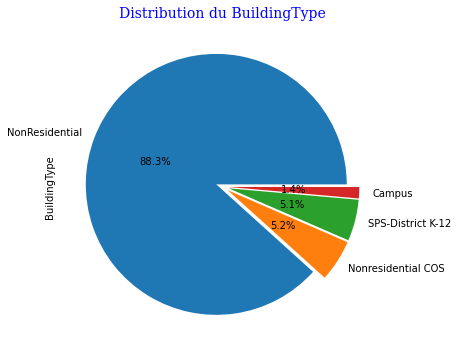

In [105]:
pie, ax = plt.subplots(figsize=[10,6])

df_analysis['BuildingType'].value_counts().plot.pie(autopct="%.1f%%", 
                                                    explode=[0.05]*df_building_type.nunique(),
                                                    pctdistance=0.5)

plt.title("Distribution du BuildingType", fontdict=font)

In [106]:
df_analysis['Neighborhood'].value_counts()

DOWNTOWN                  357
GREATER DUWAMISH          345
MAGNOLIA / QUEEN ANNE     148
LAKE UNION                146
NORTHEAST                 126
EAST                      121
NORTHWEST                  80
BALLARD                    61
NORTH                      56
CENTRAL                    47
SOUTHEAST                  45
DELRIDGE                   41
SOUTHWEST                  40
North                       9
Ballard                     6
Northwest                   5
Delridge                    4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [107]:
df_analysis["Neighborhood"] = df_analysis["Neighborhood"].str.lower().str.upper()
df_analysis['Neighborhood'].value_counts()

DOWNTOWN                  357
GREATER DUWAMISH          345
MAGNOLIA / QUEEN ANNE     148
LAKE UNION                146
NORTHEAST                 126
EAST                      121
NORTHWEST                  85
BALLARD                    67
NORTH                      65
CENTRAL                    51
SOUTHEAST                  45
DELRIDGE                   45
SOUTHWEST                  40
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [108]:
df_analysis[df_analysis['Neighborhood'] == "DELRIDGE NEIGHBORHOODS"]

DataYear        BuildingType PrimaryPropertyType  \
3370      2016  Nonresidential COS               Other   

                     PropertyName            Neighborhood  Latitude  \
3370  High Point Community Center  DELRIDGE NEIGHBORHOODS  47.54067   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3370 -122.37441       1982                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3370             18261                   0                   18261   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3370        Other - Recreation     Other - Recreation   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3370                    18261.0              NaN              51.0   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
3370               126.0           932082.125             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
3370        632362.0071       299719.9951              20.33   

      GHGEmissionsIntensity  
3370                   1.11

In [109]:
df_analysis = df_analysis.replace('DELRIDGE NEIGHBORHOODS','DELRIDGE')

In [110]:
df_analysis['Neighborhood'].value_counts()

DOWNTOWN                 357
GREATER DUWAMISH         345
MAGNOLIA / QUEEN ANNE    148
LAKE UNION               146
NORTHEAST                126
EAST                     121
NORTHWEST                 85
BALLARD                   67
NORTH                     65
CENTRAL                   51
DELRIDGE                  46
SOUTHEAST                 45
SOUTHWEST                 40
Name: Neighborhood, dtype: int64

Text(0.5, 1.0, 'Cat. Neighborhood Distribution')

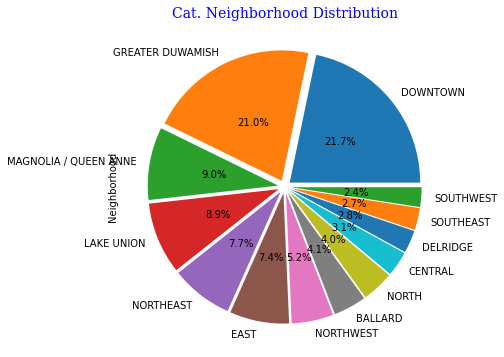

In [111]:
pie, ax = plt.subplots(figsize=[10,6])

df_analysis['Neighborhood'].value_counts().plot.pie(autopct="%.1f%%", 
                                                    explode=[0.05]*13,
                                                    pctdistance=0.5)

plt.title("Cat. Neighborhood Distribution", fontdict=font)

In [112]:
df_analysis['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    289
Other                          248
Warehouse                      187
Large Office                   173
K-12 School                    125
Mixed Use Property             112
Retail Store                    91
Hotel                           75
Worship Facility                71
Distribution Center             53
Medical Office                  39
Supermarket / Grocery Store     39
Self-Storage Facility           27
University                      23
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [113]:
df_analysis[df_analysis['PrimaryPropertyType'] == 'Low-Rise Multifamily']

DataYear    BuildingType   PrimaryPropertyType            PropertyName  \
644       2016  NonResidential  Low-Rise Multifamily          Pacific Pointe   
1300      2016          Campus  Low-Rise Multifamily         Sanitary Market   
2450      2016  NonResidential  Low-Rise Multifamily  (ID25674) COMET TAVERN   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
644    LAKE UNION  47.64859 -122.33311       2000                1.0   
1300     DOWNTOWN  47.60918 -122.34079       1942                1.0   
2450         EAST  47.61427 -122.31977       1910                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
644                3             93079               36093   
1300               4             45500                   0   
2450               3             32100                   0   

      PropertyGFABuilding(s)  \
644                    56986   
1300                   45500   
2450                   32100   

                              ListOfAllPropertyUseTypes  \
644                                 Multifamily Housing   
1300  Bar/Nightclub, Food Sales, Multifamily Housing...   
2450                 Bar/Nightclub, Multifamily Housing   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
644     Multifamily Housing                    91064.0             32.0   
1300    Multifamily Housing                    22669.0              NaN   
2450    Multifamily Housing                    21400.0              NaN   

      SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
644          21.900000           63.099998         1.997182e+06   
1300         85.199997          267.500000         3.778355e+06   
2450          3.400000            4.300000         1.082004e+05   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
644              0.0          1744199.0          252982.0              25.60   
1300             0.0          3778355.0               0.0              26.34   
2450             0.0            11370.0           96830.0               5.22   

      GHGEmissionsIntensity  
644                    0.28  
1300                   0.58  
2450                   0.16

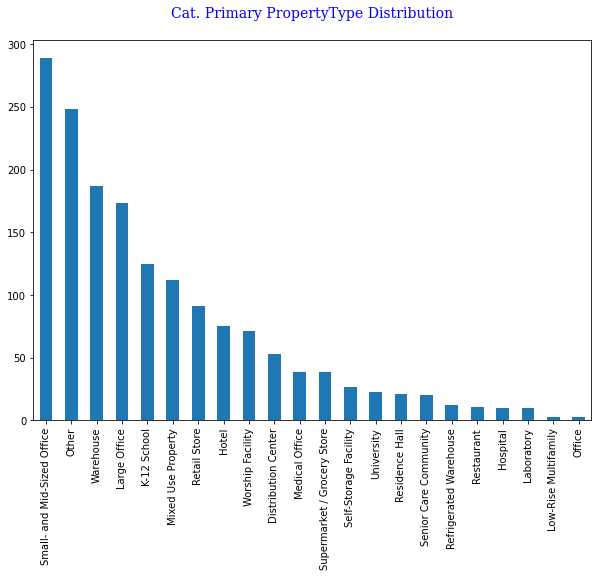

In [114]:
# Diagramme en tuyaux d'orgues
fig, ax = plt.subplots(figsize=(10, 7))

df_analysis['PrimaryPropertyType'].value_counts(normalize=False).plot(kind='bar')
plt.title("Cat. Primary PropertyType Distribution\n", fontdict=font)
plt.show()

In [115]:
df_analysis['LargestPropertyUseType'].nunique()
#df_analysis['LargestPropertyUseType'].value_counts()

55

In [116]:
nbh_counts = df_analysis['LargestPropertyUseType'].value_counts()
nbh_counts

Office                                                  495
Non-Refrigerated Warehouse                              199
K-12 School                                             125
Retail Store                                             99
Other                                                    98
Hotel                                                    76
Worship Facility                                         71
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                40
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       23
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
Senior Care Community                   

In [117]:
other_nbhs = list(nbh_counts[nbh_counts < 3].index)
other_nbhs

['Other - Public Services',
 'Lifestyle Center',
 'Other - Restaurant/Bar',
 'Adult Education',
 'Other - Utility',
 'Pre-school/Daycare',
 'Courthouse',
 'Residential Care Facility',
 'Wholesale Club/Supercenter',
 'Police Station',
 'Food Service',
 'Movie Theater',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Fire Station']

In [118]:
df_analysis['LargestPropertyUseType'] = df_analysis['LargestPropertyUseType'].replace(other_nbhs, 'Less_than_3Obs')
df_analysis['LargestPropertyUseType'].value_counts()

Office                                             495
Non-Refrigerated Warehouse                         199
K-12 School                                        125
Retail Store                                        99
Other                                               98
Hotel                                               76
Worship Facility                                    71
Distribution Center                                 54
Medical Office                                      41
Supermarket/Grocery Store                           40
Other - Recreation                                  31
Parking                                             30
Self-Storage Facility                               27
College/University                                  23
Residence Hall/Dormitory                            22
Other - Entertainment/Public Assembly               21
Senior Care Community                               20
Less_than_3Obs                                      20
Laboratory

In [119]:
df_analysis['ListOfAllPropertyUseTypes'].nunique()
#df_analysis['LargestPropertyUseType'].value_counts()

368

In [120]:
df_analysis['YearBuilt'].nunique()

113

<p class="h3"; style="color:red">Analyse Statitique Bi-varié</p>

In [121]:
df_analysis.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [122]:
data_set_struture(df_analysis)

Caractéristiques  Valeurs
0                   Nombre de lignes     1642
1                 Nombre de colonnes       25
2  Nombre de variables catégorielles        6
3    Nombre de variables numériques        19
4  Pourcentage de données manquantes        1
5                 Nombre de doublons        0

Les données comprennent 19 variables numériques  et 6 variables catégorielles. 

- Commençons par comparer la colonne numérique EnergyStarScore à la colonne catégorielle PrimaryPropertyType pour voir s'il existe une relation apparente entre le score donnée à un batiment et son PrimaryPropertyType.
- Pour faire cette comparaison, créons des boîtes à moustaches montrant la distribution de l'EnergyStarScore pour chaque PrimaryPropertyType.

In [123]:
#plt.boxplot(column=df_analysis["ENERGYSTARScore"], by=df_analysis['PrimaryPropertyType'])

[]

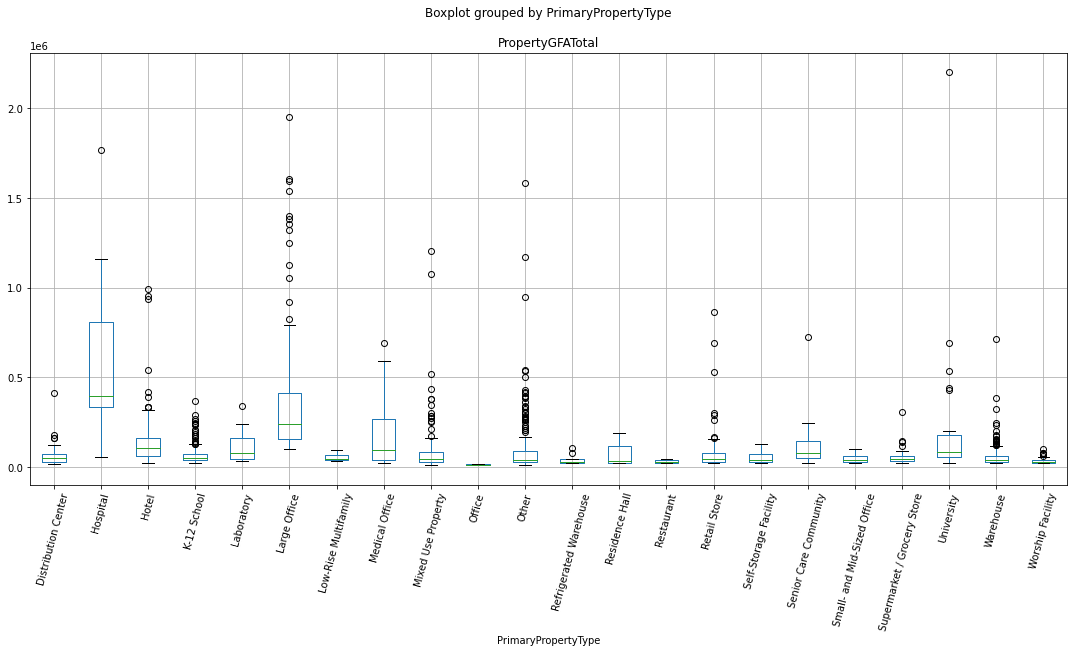

In [124]:
df_analysis.boxplot(column='PropertyGFATotal', by='PrimaryPropertyType', figsize=(18,8))
plt.xticks(rotation=75)
plt.plot()

[]

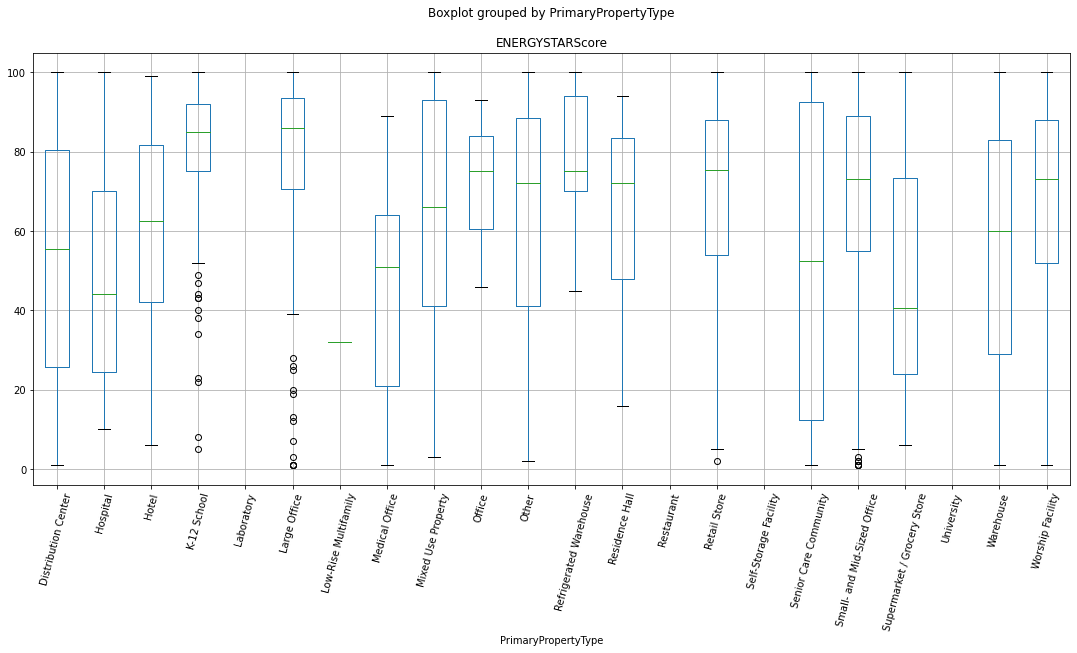

In [125]:
df_analysis.boxplot(column='ENERGYSTARScore', by='PrimaryPropertyType', figsize=(18,8))
plt.xticks(rotation=75)
plt.plot()

[]

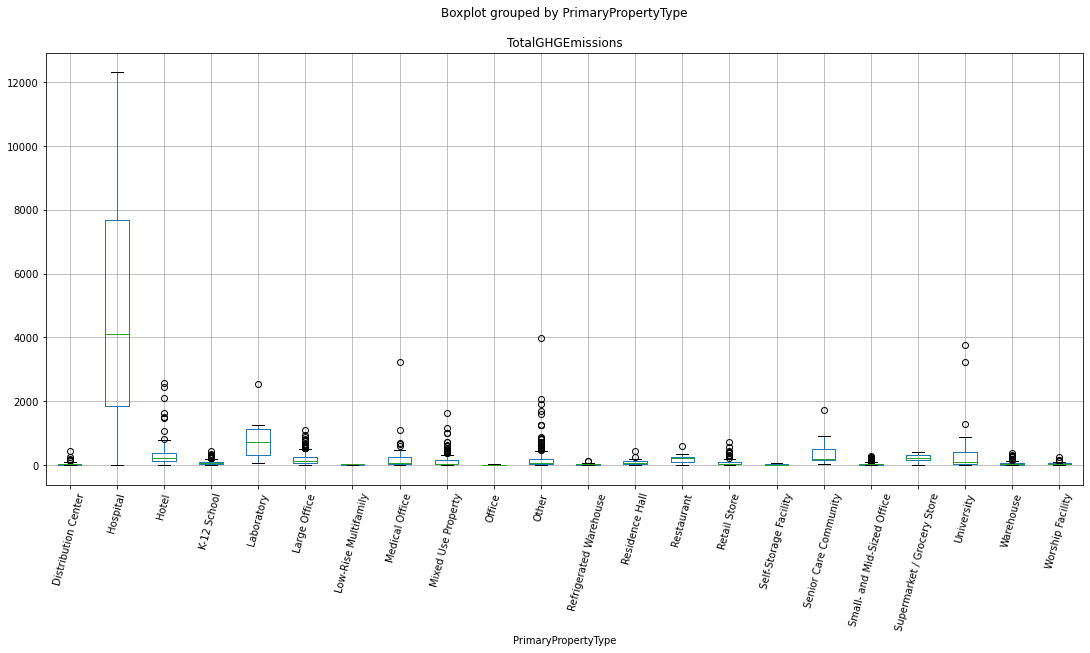

In [126]:
df_analysis.boxplot(column='TotalGHGEmissions', by='PrimaryPropertyType', figsize=(18,8))
plt.xticks(rotation=75)
plt.plot()

[]

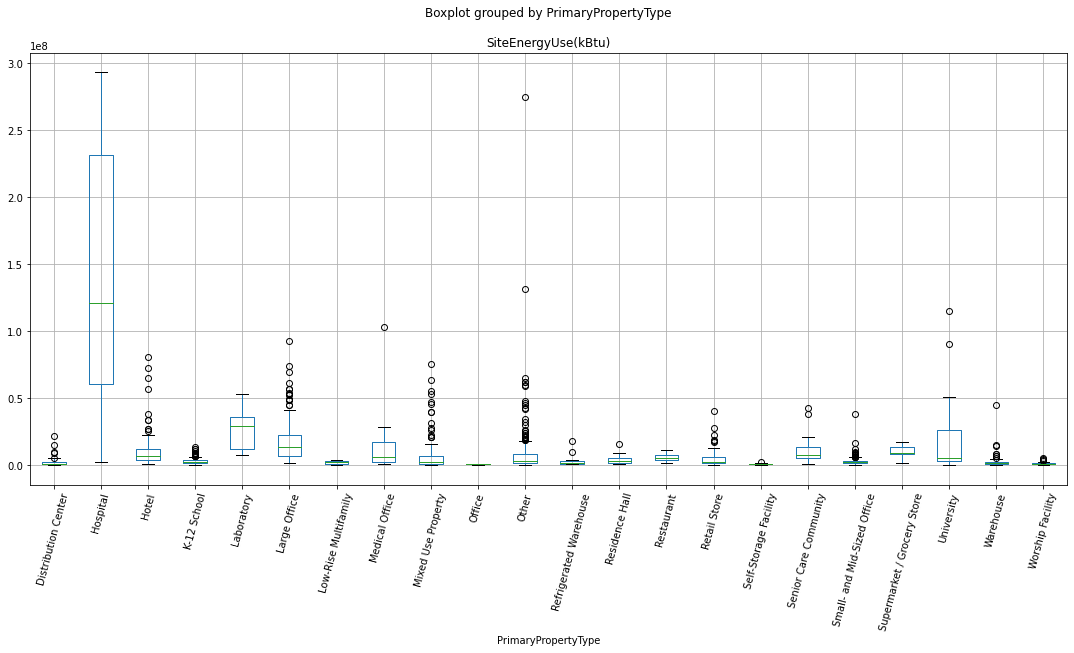

In [127]:
df_analysis.boxplot(column='SiteEnergyUse(kBtu)', by='PrimaryPropertyType', figsize=(18,8))
plt.xticks(rotation=75)
plt.plot()


#### Analyse bi-variée de deux variables numériques

In [128]:
# Create a bar plot of name vs grade and study hours
#df_analysis.plot(x='PropertyName', y=['SiteEnergyUse(kBtu)','PropertyGFATotal'], kind='bar', figsize=(8,5))

<p class="h2"; style="color:green">Columns Transformation and Feature Engineering </p>

La puissance prédictive du Machine Learning vient du fait qu’elle est façonnée par les données. Pour créer des modèles efficaces, il est important de bien comprendre les données que vous utilisez. Dans cette section, nous expérimentons  l’exploration de nouvelles données et montrons comment une réflexion approfondie sur un jeu de données peut aider à créer des modèles prédictifs plus performants.


<div class="alert alert-info" role="alert">
      
 Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les **émissions de CO2** et la **consommation totale d’énergie** de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

    
La prédiction se basera sur les données structurelles des bâtiments (**taille et usage des bâtiments**, **date de construction**, **situation géographique**, ...)  
</div>


Etant données le coût des rélevées éffectués par agents de la ville pour mesurer la **quantité de CO2 émis** et la **quantité d'électricité** utilisée. Notre mission sera de prédires ces valeurs pour les bâtiments non destinés à l'habitation pour lesquelles ces relevées n'ont pas encore été mesurées. Nous allons donc nous séparer de toutes les  variables détaillant ces consommations. L'on ne gardera ici que les colonnes montrant les quantités totales car le projet a pour objectif de se passer des relevés annuels.

In [129]:
df6 = df_analysis.copy()

In [130]:
df6.head()

DataYear    BuildingType PrimaryPropertyType                 PropertyName  \
0      2016  NonResidential               Hotel         Mayflower park hotel   
1      2016  NonResidential               Hotel              Paramount Hotel   
2      2016  NonResidential               Hotel      5673-The Westin Seattle   
3      2016  NonResidential               Hotel                    HOTEL MAX   
4      2016  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN  47.61220 -122.33799       1927                1.0   
1     DOWNTOWN  47.61317 -122.33393       1996                1.0   
2     DOWNTOWN  47.61393 -122.33810       1969                1.0   
3     DOWNTOWN  47.61412 -122.33664       1926                1.0   
4     DOWNTOWN  47.61375 -122.34047       1980                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   
3              10             61320                   0   
4              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                  Hotel                    88434.0             60.0   
1                  Hotel                    83880.0             61.0   
2                  Hotel                   756493.0             43.0   
3                  Hotel                    61320.0             56.0   
4                  Hotel                   123445.0             75.0   

   SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0         81.699997          182.500000            7226362.5      2003882.00   
1         94.800003          176.100006            8387933.0            0.00   
2         96.000000          241.899994           72587024.0     21566554.00   
3        110.800003          216.199997            6794584.0      2214446.25   
4        114.800003          211.399994           14172606.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   
1          3242851.0         5145082.0             295.86   
2         49526664.0         1493800.0            2089.28   
3          2768924.0         1811213.0             286.43   
4          5368607.0         8803998.0             505.01   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19  
3                   4.67  
4                   2.88

In [131]:
#df6['SourceEUI(kBtu/sf)'].max()
#df6['SourceEUI(kBtu/sf)'].min()

In [132]:
#df6.loc[0]['SiteEUI(kBtu/sf)'] + df6.loc[0]['SourceEUI(kBtu/sf)'] +

In [133]:
df6.loc[0]['SteamUse(kBtu)'] + df6.loc[0]['Electricity(kBtu)'] + df6.loc[0]['NaturalGas(kBtu)'] 

7226362.0

**Création de nouveaux features**

In [134]:
df6.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

**Colonnes Energie ( kBtu )**

L’objectif est de te passer des relevés de consommation annuels futurs, nous allons donc déduire des variables structurelles aux bâtiments, par exemple les proportions des **sources d’énergie utilisées** et nous séparer de ces variables en provenance des relevés

In [135]:
cols_source_energy = ['SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)']
df6[cols_source_energy].head()

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)
0            7226362.5      2003882.00          3946027.0         1276453.0
1            8387933.0            0.00          3242851.0         5145082.0
2           72587024.0     21566554.00         49526664.0         1493800.0
3            6794584.0      2214446.25          2768924.0         1811213.0
4           14172606.0            0.00          5368607.0         8803998.0

In [136]:
#On calcule les ratios - Proportion des sources d'energie utilisés

df6['SteamUse_Rate'] = (round((df6['SteamUse(kBtu)']
                                 /df6['SiteEnergyUse(kBtu)']),5))

df6['Electricity_Rate'] = (round((df6['Electricity(kBtu)']
                                 /df6['SiteEnergyUse(kBtu)']),5))

df6['NaturalGas_Rate'] = (round((df6['NaturalGas(kBtu)']
                                 /df6['SiteEnergyUse(kBtu)']),5))
df6.head(1)

DataYear    BuildingType PrimaryPropertyType          PropertyName  \
0      2016  NonResidential               Hotel  Mayflower park hotel   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN   47.6122 -122.33799       1927                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   

   PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                   88434                     Hotel                  Hotel   

   LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                    88434.0             60.0         81.699997   

   SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0               182.5            7226362.5       2003882.0          3946027.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  SteamUse_Rate  \
0         1276453.0             249.98                   2.83         0.2773   

   Electricity_Rate  NaturalGas_Rate  
0           0.54606          0.17664

**Les colonnes GFA**

Ces colonnes correspondent aux surfaces des bâtiments. Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA :

In [137]:
#cols_GFA = [col for col in df5.columns.str.contains('GFA')]
#cols_GFA

In [138]:
cols_GFA = ['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA']
df6[cols_GFA].head()

PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            956110              196718                  759392   
3             61320                   0                   61320   
4            175580               62000                  113580   

   LargestPropertyUseTypeGFA  
0                    88434.0  
1                    83880.0  
2                   756493.0  
3                    61320.0  
4                   123445.0

In [139]:
#On calcule les ratios
df6['GFABuildingRate'] = (round((df6['PropertyGFABuilding(s)']
                                  /df6['PropertyGFATotal']),5))

df6['GFAParkingRate'] = (round((df6['PropertyGFAParking']
                                 /df6['PropertyGFATotal']),5))

df6['GFALargestPropertyUseRate'] = (round((df6['LargestPropertyUseTypeGFA']
                                 /df6['PropertyGFATotal']),5))

#On supprime les variables ayant servi au calcul pour eviter une duplication d''info
df6.drop(['LargestPropertyUseTypeGFA', 'PropertyGFAParking','PropertyGFABuilding(s)'],
         axis=1, inplace=True)

df6.head(1)

DataYear    BuildingType PrimaryPropertyType          PropertyName  \
0      2016  NonResidential               Hotel  Mayflower park hotel   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN   47.6122 -122.33799       1927                1.0   

   NumberofFloors  PropertyGFATotal ListOfAllPropertyUseTypes  \
0              12             88434                     Hotel   

  LargestPropertyUseType  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                  Hotel             60.0         81.699997   

   SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0               182.5            7226362.5       2003882.0          3946027.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  SteamUse_Rate  \
0         1276453.0             249.98                   2.83         0.2773   

   Electricity_Rate  NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0           0.54606          0.17664              1.0             0.0   

   GFALargestPropertyUseRate  
0                        1.0

**Colonne ListOfAllPropertyUseTypes**

Cette colonne contient, pour chaque bâtiment, les différents usages qui en sont faits.

In [140]:
df6['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df6['ListOfAllPropertyUseTypes'].str.split(',')]
df6.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)
df6.head(1)

DataYear    BuildingType PrimaryPropertyType          PropertyName  \
0      2016  NonResidential               Hotel  Mayflower park hotel   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN   47.6122 -122.33799       1927                1.0   

   NumberofFloors  PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  \
0              12             88434                  Hotel             60.0   

   SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0         81.699997               182.5            7226362.5       2003882.0   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   

   GHGEmissionsIntensity  SteamUse_Rate  Electricity_Rate  NaturalGas_Rate  \
0                   2.83         0.2773           0.54606          0.17664   

   GFABuildingRate  GFAParkingRate  GFALargestPropertyUseRate  \
0              1.0             0.0                        1.0   

   TotalUseTypeNumber  
0                   1

-----> **L'age des bâtiments** : 

plus que l'année de construction, il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion des données et lier l'année des relevés. Nous allons donc créer cette nouvelle variable et supprimer l'année de construction.

**Les colonnes Year**

Création d'une nouvelle colonne **BuildingAge** à partir des colonnes **DataYear** et **YearBuilt**

In [141]:
df6['BuildingAge'] = df6['DataYear'] - df6['YearBuilt']
df6.drop(columns = ['YearBuilt', 'DataYear'], axis=1, inplace=True)

In [142]:
df6.head()

BuildingType PrimaryPropertyType                 PropertyName  \
0  NonResidential               Hotel         Mayflower park hotel   
1  NonResidential               Hotel              Paramount Hotel   
2  NonResidential               Hotel      5673-The Westin Seattle   
3  NonResidential               Hotel                    HOTEL MAX   
4  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799                1.0              12   
1     DOWNTOWN  47.61317 -122.33393                1.0              11   
2     DOWNTOWN  47.61393 -122.33810                1.0              41   
3     DOWNTOWN  47.61412 -122.33664                1.0              10   
4     DOWNTOWN  47.61375 -122.34047                1.0              18   

   PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0             88434                  Hotel             60.0         81.699997   
1            103566                  Hotel             61.0         94.800003   
2            956110                  Hotel             43.0         96.000000   
3             61320                  Hotel             56.0        110.800003   
4            175580                  Hotel             75.0        114.800003   

   SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0          182.500000            7226362.5      2003882.00          3946027.0   
1          176.100006            8387933.0            0.00          3242851.0   
2          241.899994           72587024.0     21566554.00         49526664.0   
3          216.199997            6794584.0      2214446.25          2768924.0   
4          211.399994           14172606.0            0.00          5368607.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  SteamUse_Rate  \
0         1276453.0             249.98                   2.83        0.27730   
1         5145082.0             295.86                   2.86        0.00000   
2         1493800.0            2089.28                   2.19        0.29711   
3         1811213.0             286.43                   4.67        0.32591   
4         8803998.0             505.01                   2.88        0.00000   

   Electricity_Rate  NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0           0.54606          0.17664          1.00000         0.00000   
1           0.38661          0.61339          0.85455         0.14545   
2           0.68231          0.02058          0.79425         0.20575   
3           0.40752          0.26657          1.00000         0.00000   
4           0.37880          0.62120          0.64688         0.35312   

   GFALargestPropertyUseRate  TotalUseTypeNumber  BuildingAge  
0                    1.00000                   1           89  
1                    0.80992                   3           20  
2                    0.79122                   1           47  
3                    1.00000                   1           90  
4                    0.70307                   3           36

In [143]:
df_cols_created = df6.copy()

In [144]:
#df_cols_created.to_csv('data_cleaned.csv')

**Colonnes Rélevés Fuite de données**

Notre objectif est de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées. Notre prédiction devra se baser sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..).

Nous allons donc exclure toutes les données de relève énergétiques de notre dataset pour éviter une fuite de données

In [145]:
df7 = df_cols_created.copy()

In [146]:
df7.head(1)

BuildingType PrimaryPropertyType          PropertyName Neighborhood  \
0  NonResidential               Hotel  Mayflower park hotel     DOWNTOWN   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0   47.6122 -122.33799                1.0              12             88434   

  LargestPropertyUseType  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                  Hotel             60.0         81.699997   

   SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0               182.5            7226362.5       2003882.0          3946027.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  SteamUse_Rate  \
0         1276453.0             249.98                   2.83         0.2773   

   Electricity_Rate  NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0           0.54606          0.17664              1.0             0.0   

   GFALargestPropertyUseRate  TotalUseTypeNumber  BuildingAge  
0                        1.0                   1           89

In [147]:
cols_releves = ['SteamUse(kBtu)', 'Electricity(kBtu)','NaturalGas(kBtu)', 'SiteEUI(kBtu/sf)', 
                'SourceEUI(kBtu/sf)','GHGEmissionsIntensity']

In [148]:
#On supprime les variables ayant été relevé pour eviter une duplication d''info (fuites d'informationq)


df7.drop(columns = cols_releves, axis=1, inplace=True)

In [149]:
df7.head()

BuildingType PrimaryPropertyType                 PropertyName  \
0  NonResidential               Hotel         Mayflower park hotel   
1  NonResidential               Hotel              Paramount Hotel   
2  NonResidential               Hotel      5673-The Westin Seattle   
3  NonResidential               Hotel                    HOTEL MAX   
4  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799                1.0              12   
1     DOWNTOWN  47.61317 -122.33393                1.0              11   
2     DOWNTOWN  47.61393 -122.33810                1.0              41   
3     DOWNTOWN  47.61412 -122.33664                1.0              10   
4     DOWNTOWN  47.61375 -122.34047                1.0              18   

   PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  \
0             88434                  Hotel             60.0   
1            103566                  Hotel             61.0   
2            956110                  Hotel             43.0   
3             61320                  Hotel             56.0   
4            175580                  Hotel             75.0   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  SteamUse_Rate  Electricity_Rate  \
0            7226362.5             249.98        0.27730           0.54606   
1            8387933.0             295.86        0.00000           0.38661   
2           72587024.0            2089.28        0.29711           0.68231   
3            6794584.0             286.43        0.32591           0.40752   
4           14172606.0             505.01        0.00000           0.37880   

   NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0          0.17664          1.00000         0.00000   
1          0.61339          0.85455         0.14545   
2          0.02058          0.79425         0.20575   
3          0.26657          1.00000         0.00000   
4          0.62120          0.64688         0.35312   

   GFALargestPropertyUseRate  TotalUseTypeNumber  BuildingAge  
0                    1.00000                   1           89  
1                    0.80992                   3           20  
2                    0.79122                   1           47  
3                    1.00000                   1           90  
4                    0.70307                   3           36

In [150]:
df_sans_fuites = df7.copy()

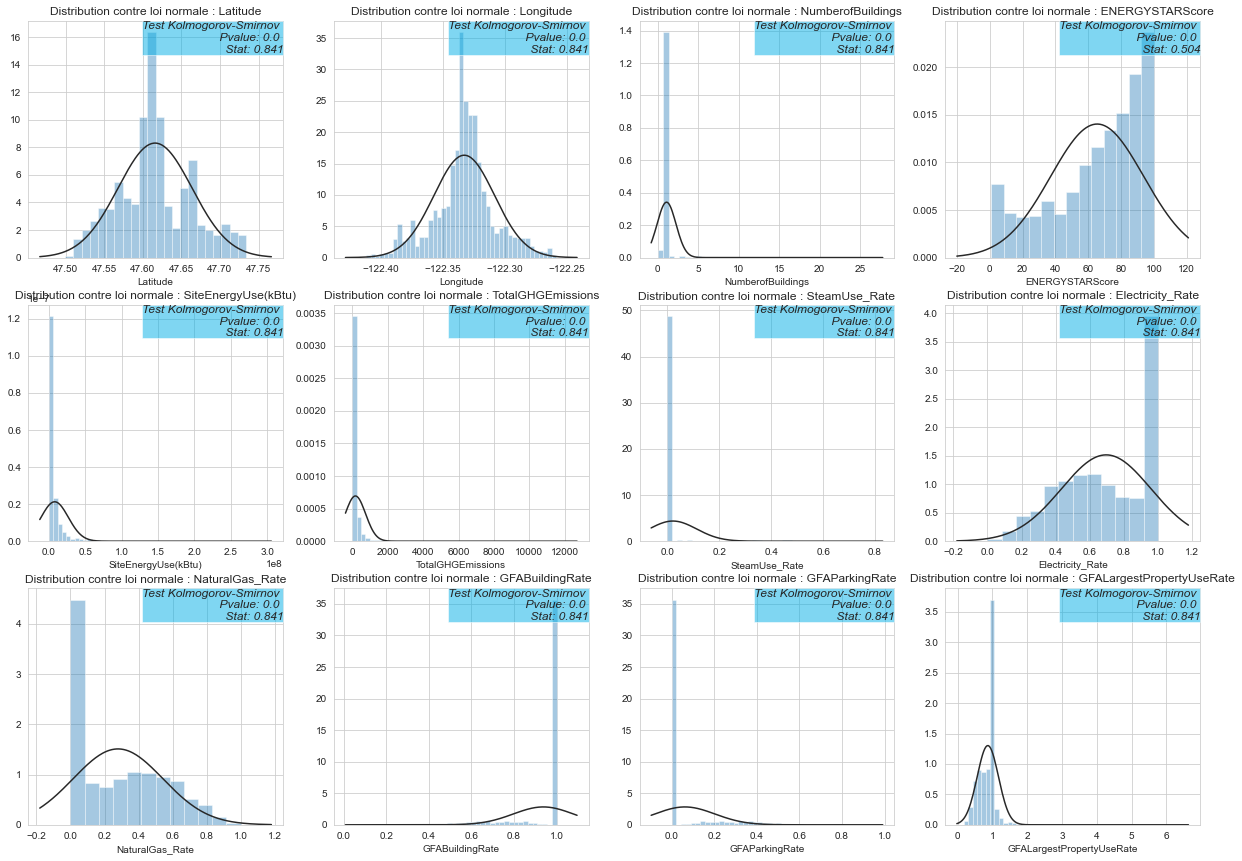

In [151]:
#regardons maintenant si la distribution de nos variables suit une loi normale 
       
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))
numerical_cols = list(df_sans_fuites.select_dtypes(include=["float64"]).columns)
sub = 0
for i in range(len(numerical_cols)):
    fig.add_subplot(4,4,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_cols[i]
    kstest = stats.kstest(df_sans_fuites[colonne].notnull(),'norm')
    
    ax = sns.distplot(df_sans_fuites[colonne], fit=stats.norm, kde=False)
    
    ax.set_title("Distribution contre loi normale : {}".format(colonne))
    
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.4} \n Stat: {:.3}'.
            format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    
    sub += 1
plt.show()

#### Matrice de correlation des variables quantitatives

La statistique de corrélation est une valeur comprise entre -1 et 1 qui indique la force d'une relation. Les valeurs supérieures à 0 indiquent une corrélation positive (les valeurs élevées d'une variable ont tendance à coïncider avec les valeurs élevées de l'autre), tandis que les valeurs inférieures à 0 indiquent une corrélation négative (les valeurs élevées d'une variable ont tendance à coïncider avec les valeurs faibles de l'autre). Dans ce cas, la valeur de corrélation est proche de 1 ; montrant une corrélation fortement positive entre le temps d'étude et la note.

Text(0.5, 1.0, 'Coefficients de corrélation de Pearson\n')

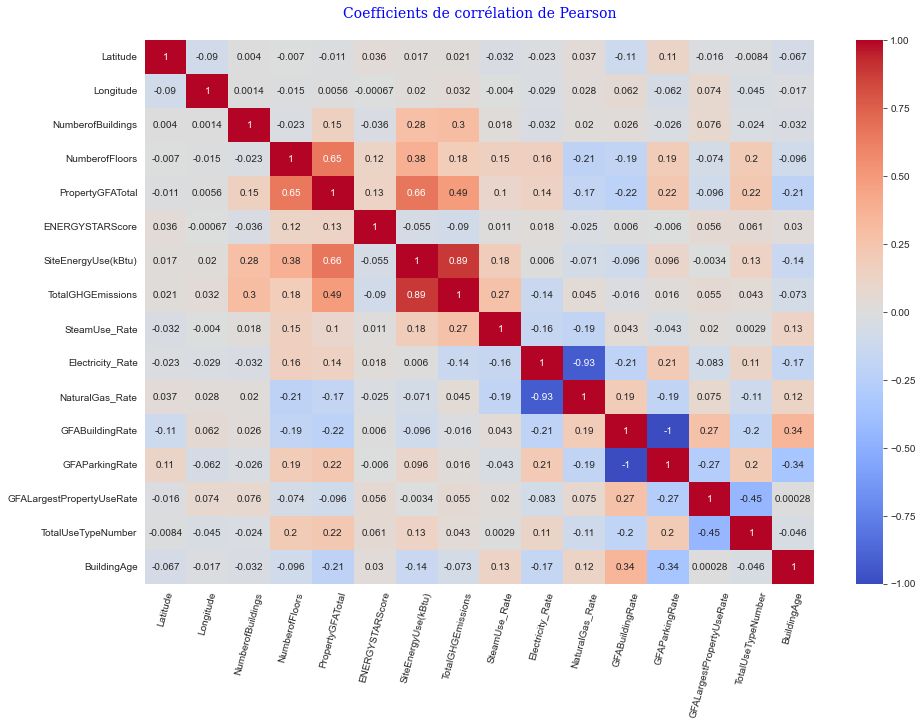

In [152]:
import seaborn as sns

font = {'family': 'serif', 'color':  'blue', 'weight': 'normal','size': 14}

plt.figure(figsize=(15,10))
sns.heatmap(df7.corr(), annot=True, cmap="coolwarm").set_title('HeatMap')
plt.xticks(rotation=75)
plt.title("Coefficients de corrélation de Pearson\n", fontdict=font)

#### Analyse de la relation entre nos deux target variables 

https://docs.microsoft.com/fr-fr/learn/modules/explore-analyze-data-with-python/7-exercise-real-world-data

[]

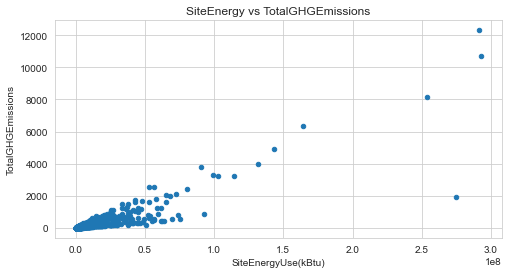

In [153]:
# Create a scatter plot
#plt.figure(figsize=(19,10))
df7.plot.scatter(title='SiteEnergy vs TotalGHGEmissions', x='SiteEnergyUse(kBtu)',y='TotalGHGEmissions',
                 figsize=(8,4))
plt.plot()

[]

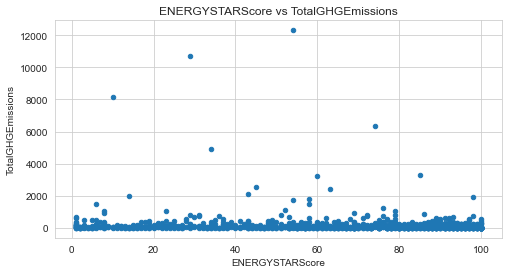

In [154]:
df7.plot.scatter(title='ENERGYSTARScore vs TotalGHGEmissions', x='ENERGYSTARScore',y='TotalGHGEmissions',
                 figsize=(8,4))
plt.plot()

[]

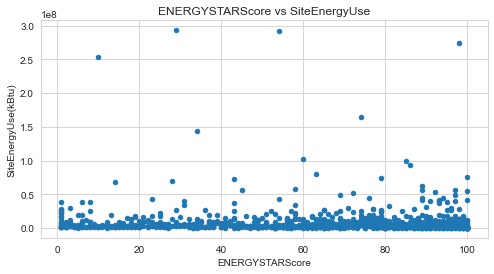

In [155]:
df7.plot.scatter(title='ENERGYSTARScore vs SiteEnergyUse', x='ENERGYSTARScore',y='SiteEnergyUse(kBtu)',
                 figsize=(8,4))
plt.plot()

   Slope: 0.0000
   Y-intercept: -40.2133

   f(x) = 0.0000x + -40.2133


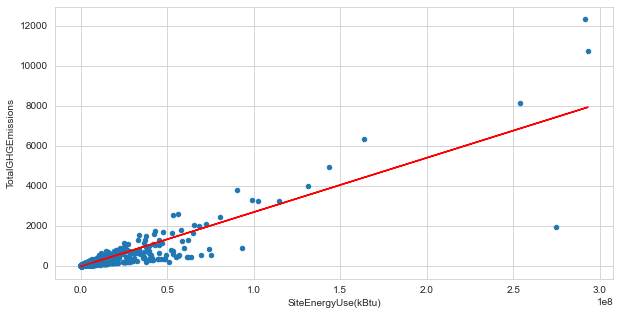

In [156]:
from scipy import stats

#
df_regression = df7[['LargestPropertyUseType','SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['SiteEnergyUse(kBtu)'], df_regression['TotalGHGEmissions'])
print('   Slope: {:.4f}\n   Y-intercept: {:.4f}'.format(m,b))
print('\n   f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x  value
df_regression['fx'] = (m * df_regression['SiteEnergyUse(kBtu)']) + b

# Calculate the error between f(x) and the actual y  value
df_regression['error'] = df_regression['fx'] - df_regression['TotalGHGEmissions']

# Create a scatter plot of X vs y
df_regression.plot.scatter(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', figsize=(10,5))

# Plot the regression line
plt.plot(df_regression['SiteEnergyUse(kBtu)'],df_regression['fx'], color='red')

# Display the plot
plt.show()

In [157]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['LargestPropertyUseType','SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'fx', 'error']].head(5)

LargestPropertyUseType  SiteEnergyUse(kBtu)  TotalGHGEmissions           fx  \
0                  Hotel            7226362.5             249.98   156.020095   
1                  Hotel            8387933.0             295.86   187.562794   
2                  Hotel           72587024.0            2089.28  1930.903048   
3                  Hotel            6794584.0             286.43   144.295056   
4                  Hotel           14172606.0             505.01   344.646845   

        error  
0  -93.959905  
1 -108.297206  
2 -158.376952  
3 -142.134944  
4 -160.363155

**Log Transformation skew variables**


In [158]:
df8 = df_sans_fuites.copy()

In [159]:
# Affichage des variables quantitatives
numerical_cols = df8.select_dtypes(include=["float64","int64"]).columns
print("Quantitatuve Cols : ", numerical_cols)

Quantitatuve Cols :  Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object')


In [160]:
# Create a list of float colums to check for skewing

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df8[numerical_cols].skew()
skew_vals

Latitude                      0.230612
Longitude                    -0.057106
NumberofBuildings            13.898451
NumberofFloors                6.005354
PropertyGFATotal              5.005598
ENERGYSTARScore              -0.779957
SiteEnergyUse(kBtu)           9.045207
TotalGHGEmissions            13.221598
SteamUse_Rate                 4.710258
Electricity_Rate             -0.329636
NaturalGas_Rate               0.472253
GFABuildingRate              -2.453727
GFAParkingRate                2.453727
GFALargestPropertyUseRate     5.767949
TotalUseTypeNumber            2.007010
BuildingAge                   0.288877
dtype: float64

In [161]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
NumberofBuildings          13.898451
TotalGHGEmissions          13.221598
SiteEnergyUse(kBtu)         9.045207
NumberofFloors              6.005354
GFALargestPropertyUseRate   5.767949
PropertyGFATotal            5.005598
SteamUse_Rate               4.710258
GFAParkingRate              2.453727
TotalUseTypeNumber          2.007010
ENERGYSTARScore            -0.779957
GFABuildingRate            -2.453727

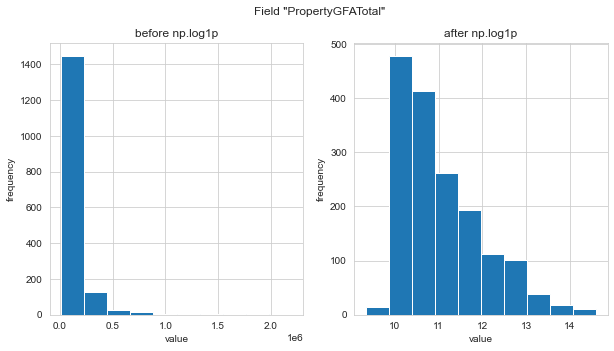

In [162]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "PropertyGFATotal"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df7[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df7[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [163]:
# Perform the skew transformation just on features 

target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

for col in skew_cols.index.values:
    if col in target_cols:
        continue
    df8[col] = df8[col].apply(np.log1p)

In [164]:
df8.head()

BuildingType PrimaryPropertyType                 PropertyName  \
0  NonResidential               Hotel         Mayflower park hotel   
1  NonResidential               Hotel              Paramount Hotel   
2  NonResidential               Hotel      5673-The Westin Seattle   
3  NonResidential               Hotel                    HOTEL MAX   
4  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799           0.693147        2.564949   
1     DOWNTOWN  47.61317 -122.33393           0.693147        2.484907   
2     DOWNTOWN  47.61393 -122.33810           0.693147        3.737670   
3     DOWNTOWN  47.61412 -122.33664           0.693147        2.397895   
4     DOWNTOWN  47.61375 -122.34047           0.693147        2.944439   

   PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  \
0         11.390023                  Hotel         4.110874   
1         11.547974                  Hotel         4.127134   
2         13.770629                  Hotel         3.784190   
3         11.023878                  Hotel         4.043051   
4         12.075856                  Hotel         4.330733   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  SteamUse_Rate  Electricity_Rate  \
0            7226362.5             249.98       0.244748           0.54606   
1            8387933.0             295.86       0.000000           0.38661   
2           72587024.0            2089.28       0.260139           0.68231   
3            6794584.0             286.43       0.282099           0.40752   
4           14172606.0             505.01       0.000000           0.37880   

   NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0          0.17664         0.693147        0.000000   
1          0.61339         0.617642        0.135798   
2          0.02058         0.584587        0.187102   
3          0.26657         0.693147        0.000000   
4          0.62120         0.498883        0.302413   

   GFALargestPropertyUseRate  TotalUseTypeNumber  BuildingAge  
0                   0.693147            0.693147           89  
1                   0.593283            1.386294           20  
2                   0.582897            0.693147           47  
3                   0.693147            0.693147           90  
4                   0.532433            1.386294           36

In [165]:
df_log_transform = df8.copy()

In [166]:
df_log_transform.head()

BuildingType PrimaryPropertyType                 PropertyName  \
0  NonResidential               Hotel         Mayflower park hotel   
1  NonResidential               Hotel              Paramount Hotel   
2  NonResidential               Hotel      5673-The Westin Seattle   
3  NonResidential               Hotel                    HOTEL MAX   
4  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799           0.693147        2.564949   
1     DOWNTOWN  47.61317 -122.33393           0.693147        2.484907   
2     DOWNTOWN  47.61393 -122.33810           0.693147        3.737670   
3     DOWNTOWN  47.61412 -122.33664           0.693147        2.397895   
4     DOWNTOWN  47.61375 -122.34047           0.693147        2.944439   

   PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  \
0         11.390023                  Hotel         4.110874   
1         11.547974                  Hotel         4.127134   
2         13.770629                  Hotel         3.784190   
3         11.023878                  Hotel         4.043051   
4         12.075856                  Hotel         4.330733   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  SteamUse_Rate  Electricity_Rate  \
0            7226362.5             249.98       0.244748           0.54606   
1            8387933.0             295.86       0.000000           0.38661   
2           72587024.0            2089.28       0.260139           0.68231   
3            6794584.0             286.43       0.282099           0.40752   
4           14172606.0             505.01       0.000000           0.37880   

   NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0          0.17664         0.693147        0.000000   
1          0.61339         0.617642        0.135798   
2          0.02058         0.584587        0.187102   
3          0.26657         0.693147        0.000000   
4          0.62120         0.498883        0.302413   

   GFALargestPropertyUseRate  TotalUseTypeNumber  BuildingAge  
0                   0.693147            0.693147           89  
1                   0.593283            1.386294           20  
2                   0.582897            0.693147           47  
3                   0.693147            0.693147           90  
4                   0.532433            1.386294           36

In [167]:
#df_log_transform.to_csv('data_log_transform.csv')

**Encodage des variables catégorielles**

In [168]:
df9 = df_log_transform.copy()

In [169]:
df9.drop('PropertyName', axis=1, inplace=True)

In [170]:
# Affichage des Variables catégorielles - column names
categorical_cols = df9.select_dtypes(include=["object"]).columns.to_list()
print("Catégorical Cols" , categorical_cols)

Catégorical Cols ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']


In [171]:
# Get a list consisting of all the string categoricals
df9[categorical_cols].T

0               1               2     \
BuildingType            NonResidential  NonResidential  NonResidential   
PrimaryPropertyType              Hotel           Hotel           Hotel   
Neighborhood                  DOWNTOWN        DOWNTOWN        DOWNTOWN   
LargestPropertyUseType           Hotel           Hotel           Hotel   

                                  3               4                   5     \
BuildingType            NonResidential  NonResidential  Nonresidential COS   
PrimaryPropertyType              Hotel           Hotel               Other   
Neighborhood                  DOWNTOWN        DOWNTOWN            DOWNTOWN   
LargestPropertyUseType           Hotel           Hotel      Less_than_3Obs   

                                  6                                      7     \
BuildingType            NonResidential                         NonResidential   
PrimaryPropertyType              Hotel                                  Other   
Neighborhood                  DOWNTOWN                               DOWNTOWN   
LargestPropertyUseType           Hotel  Other - Entertainment/Public Assembly   

                                  8               10              11    \
BuildingType            NonResidential  NonResidential  NonResidential   
PrimaryPropertyType              Hotel           Hotel           Hotel   
Neighborhood                  DOWNTOWN        DOWNTOWN        DOWNTOWN   
LargestPropertyUseType           Hotel           Hotel           Hotel   

                                  12              13              14    \
BuildingType            NonResidential  NonResidential  NonResidential   
PrimaryPropertyType              Hotel           Hotel           Hotel   
Neighborhood                  DOWNTOWN        DOWNTOWN        DOWNTOWN   
LargestPropertyUseType           Hotel           Hotel           Hotel   

                                      15                              16    \
BuildingType            Nonresidential COS                  NonResidential   
PrimaryPropertyType                  Other                           Other   
Neighborhood                      DOWNTOWN                        DOWNTOWN   
LargestPropertyUseType             Library  Fitness Center/Health Club/Gym   

                                  17                   18              19    \
BuildingType            NonResidential       NonResidential  NonResidential   
PrimaryPropertyType              Hotel   Mixed Use Property           Hotel   
Neighborhood                  DOWNTOWN             DOWNTOWN        DOWNTOWN   
LargestPropertyUseType           Hotel  Social/Meeting Hall           Hotel   

                                  20              21                 22    \
BuildingType            NonResidential  NonResidential  SPS-District K-12   
PrimaryPropertyType              Other           Other        K-12 School   
Neighborhood                  DOWNTOWN        DOWNTOWN          SOUTHEAST   
LargestPropertyUseType  Less_than_3Obs           Other        K-12 School   

                                  23                  24    \
BuildingType            NonResidential      NonResidential   
PrimaryPropertyType              Hotel          University   
Neighborhood                 NORTHEAST            DOWNTOWN   
LargestPropertyUseType           Hotel  College/University   

                                         25              26              27    \
BuildingType                   NonResidential  NonResidential  NonResidential   
PrimaryPropertyType                     Other           Hotel           Hotel   
Neighborhood                         DOWNTOWN            EAST        DOWNTOWN   
LargestPropertyUseType  Automobile Dealership           Hotel           Hotel   

                                  29                 30    \
BuildingType            NonResidential  SPS-District K-12   
PrimaryPropertyType              Hotel        K-12 School   
Neighborhood                  DOWNTOWN             

In [172]:
# Make copies of data with various representations for categorical features. 
data_numeric = df9.copy() # categorical fields are label encoded but numerical
data_categorical = df9.copy() # categorical fields are label encoded, numeric but categorical type

# Do the one hot encoding of dummies variables
data_ohe = pd.get_dummies(df9,columns=categorical_cols, 
                          drop_first=True, sparse=False) # categorical fields are one hot encoded

In [173]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Convert categorical columns to numeric encoded labels
for col in categorical_cols:
    data_numeric[col] = (LabelEncoder().fit_transform(data_numeric[col]))
    data_categorical[col] = data_numeric[col].astype("category")  

#data_numeric.head()
#data_categorical.head()’
#data_ohe.head()

In [174]:
#data_numeric.info()

In [175]:
#data_categorical.info()

In [176]:
#data_ohe.info()

In [177]:
#data_numeric.to_csv('data_numeric.csv')

In [190]:
data_categorical.to_csv('data_categoricale.csv')

In [179]:
#data_ohe.to_csv('data_ohe.csv')

## Regression Linéaire Multiple - Librairie Statsmodels

We will create a simple Multiple Linear Regression model and train it on our dataset.

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [181]:
df_model = df_log_transform.copy()
df_model.head()

BuildingType PrimaryPropertyType                 PropertyName  \
0  NonResidential               Hotel         Mayflower park hotel   
1  NonResidential               Hotel              Paramount Hotel   
2  NonResidential               Hotel      5673-The Westin Seattle   
3  NonResidential               Hotel                    HOTEL MAX   
4  NonResidential               Hotel  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799           0.693147        2.564949   
1     DOWNTOWN  47.61317 -122.33393           0.693147        2.484907   
2     DOWNTOWN  47.61393 -122.33810           0.693147        3.737670   
3     DOWNTOWN  47.61412 -122.33664           0.693147        2.397895   
4     DOWNTOWN  47.61375 -122.34047           0.693147        2.944439   

   PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  \
0         11.390023                  Hotel         4.110874   
1         11.547974                  Hotel         4.127134   
2         13.770629                  Hotel         3.784190   
3         11.023878                  Hotel         4.043051   
4         12.075856                  Hotel         4.330733   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  SteamUse_Rate  Electricity_Rate  \
0            7226362.5             249.98       0.244748           0.54606   
1            8387933.0             295.86       0.000000           0.38661   
2           72587024.0            2089.28       0.260139           0.68231   
3            6794584.0             286.43       0.282099           0.40752   
4           14172606.0             505.01       0.000000           0.37880   

   NaturalGas_Rate  GFABuildingRate  GFAParkingRate  \
0          0.17664         0.693147        0.000000   
1          0.61339         0.617642        0.135798   
2          0.02058         0.584587        0.187102   
3          0.26657         0.693147        0.000000   
4          0.62120         0.498883        0.302413   

   GFALargestPropertyUseRate  TotalUseTypeNumber  BuildingAge  
0                   0.693147            0.693147           89  
1                   0.593283            1.386294           20  
2                   0.582897            0.693147           47  
3                   0.693147            0.693147           90  
4                   0.532433            1.386294           36

In [182]:
# Perform the skew transformation just on targets 

target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

for col in target_cols:
    df_model[col] = df_model[col].apply(np.log1p)

In [183]:
df_model = df_model.rename(columns= {"SiteEnergyUse(kBtu)":"SiteEnergyUse"})

In [184]:
df_model.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseType', 'ENERGYSTARScore',
       'SiteEnergyUse', 'TotalGHGEmissions', 'SteamUse_Rate',
       'Electricity_Rate', 'NaturalGas_Rate', 'GFABuildingRate',
       'GFAParkingRate', 'GFALargestPropertyUseRate', 'TotalUseTypeNumber',
       'BuildingAge'],
      dtype='object')

In [185]:
# C(PrimaryPropertyType) + C(LargestPropertyUseType)

In [187]:
# Fit a simple model that finds a linear relationship
# between our target variable and the features seleted, which we can use later
# to predict a give site energy consumption, given some features

"""
reg_multi = smf.ols("SiteEnergyUse ~ BuildingAge + PropertyGFATotal + NumberofBuildings + NumberofFloors +\
                    Latitude + Longitude + SteamUse_Rate + Electricity_Rate + NaturalGas_Rate +\
                    GFABuildingRate + GFALargestPropertyUseRate + TotalUseTypeNumber + ENERGYSTARScore +\
                     C(BuildingType) + C(Neighborhood)+ C(Pr’imaryPropertyType) + C(LargestPropertyUseType)"
                    ,data=df_model).fit()

print("Model trained!")
print(reg_multi.summary())

"""

'\nreg_multi = smf.ols("SiteEnergyUse ~ BuildingAge + PropertyGFATotal + NumberofBuildings + NumberofFloors +                    Latitude + Longitude + SteamUse_Rate + Electricity_Rate + NaturalGas_Rate +                    GFABuildingRate + GFALargestPropertyUseRate + TotalUseTypeNumber + ENERGYSTARScore +                     C(BuildingType) + C(Neighborhood)+ C(Pr’imaryPropertyType) + C(LargestPropertyUseType)"\n                    ,data=df_model).fit()\n\nprint("Model trained!")\nprint(reg_multi.summary())\n\n'

In [188]:
reg_multi = smf.ols("TotalGHGEmissions ~ BuildingAge + PropertyGFATotal + NumberofBuildings + NumberofFloors +\
                    Latitude + Longitude + SteamUse_Rate + Electricity_Rate + NaturalGas_Rate +\
                    GFABuildingRate + GFALargestPropertyUseRate + TotalUseTypeNumber + ENERGYSTARScore +\
                     C(BuildingType) + C(Neighborhood)+ C(PrimaryPropertyType) + C(LargestPropertyUseType)"
                    ,data=df_model).fit()

print("Model trained!")
print(reg_multi.summary())

Model trained!
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     209.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:59:02   Log-Likelihood:                -540.99
No. Observations:                1088   AIC:                             1196.
Df Residuals:                    1031   BIC:                             1481.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## Saving and loading a model

In [ ]:
import joblib

model_filename = 'siteenergyuse_model.pkl'
joblib.dump(reg_multi, model_filename)

print("Model saved!")

In [ ]:
model_loaded = joblib.load(model_filename)
model_loaded

In [ ]:
print("We have loaded a model with the following parameters:")
print(model_loaded.params)

In [ ]:
intercept = model_loaded.params[0]
slope = model_loaded.params[1]

In [ ]:
print("Models Parameters : ")
print("- Intercept is {:.2f}\n- Slope is {:.2f}".format(intercept, slope))

In [ ]:
print(f"The model is: y = {slope:0.3f} * X + {intercept:0.3f}")

In [ ]:
#model_loaded.params[3]

In [ ]:
model_loaded.params[0].round(3)

In [ ]:
int(model_loaded.params[0])

In [ ]:
Intercept = model_loaded.params[0].round(3)

print("Model Intercept :", Intercept)

In [ ]:
#print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

print("Model Intercept: {:.3f}\nRound value: {:.0f}".format(model_loaded.params[0], Intercept))